In [ ]:
import os
import pandas as pd
from datetime import datetime, time
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np
import requests
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import pytz

Disclaimer: Google AI studio to help with all of this

## Mega Delay Day Identification

In [ ]:
#1 -- Combine weather snow and control csv files -- #

# read CSV files into their own data frames
# combine the two dataframes. Columns should be the same.

snow_filepath = './weather_delay_CONTROL.csv'
control_filepath = './weather_delay_SNOW.csv'

df_snow = pd.read_csv(snow_filepath)
print(df_snow.shape)
df_control = pd.read_csv(control_filepath)
print(df_control.shape)

if list(df_snow.columns) != list(df_control.columns):
    print('Colum names do not match')

df_combined_weather = pd.concat([df_snow, df_control], ignore_index=True)
print(df_combined_weather.shape)


(55, 18)
(55, 18)
(110, 18)


In [ ]:
#2 -- Sort for the highest mean delay days and check if the highest are snow days -- #

In [ ]:
df_sorted_by_delay = df_combined_weather.sort_values(by='mean_arrival_delay', ascending=False)
df_sorted_by_delay.head(40)

date  temp  ground_code                      ground_expl  \
77   2022-11-22   1.5           17          complete_snow_loose_dry   
76   2022-11-21   0.1           17          complete_snow_loose_dry   
87   2023-03-08  -3.1           17          complete_snow_loose_dry   
89   2023-03-27  -3.9           17          complete_snow_loose_dry   
88   2023-03-09  -5.2           17          complete_snow_loose_dry   
68   2021-12-02  -1.3           12  partial_snow_packed_wet_el_half   
12   2021-11-09   0.0            0                              dry   
69   2021-12-03  -5.2           17          complete_snow_loose_dry   
67   2021-11-23   0.4           12  partial_snow_packed_wet_el_half   
74   2022-02-22  -4.2           17          complete_snow_loose_dry   
62   2021-02-03  -6.0           17          complete_snow_loose_dry   
102  2024-01-15  -5.6           17          complete_snow_loose_dry   
59   2021-01-15  -9.9           17          complete_snow_loose_dry   
21   2022-11-07  10.0            0                              dry   
91   2023-03-30  -4.6           17          complete_snow_loose_dry   
29   2023-02-01  -0.7            0                              dry   
81   2022-12-15  -9.2           17          complete_snow_loose_dry   
8    2021-02-05  -8.9           17          complete_snow_loose_dry   
104  2024-01-17  -2.0           17          complete_snow_loose_dry   
13   2021-12-07 -12.6           17          complete_snow_loose_dry   
22   2022-11-08   7.2            0                              dry   
108  2024-02-14  -2.3           17          complete_snow_loose_dry   
63   2021-02-11 -11.8           17          complete_snow_loose_dry   
23   2022-12-06  -4.0            0                              dry   
27   2023-01-12   3.2            0                              dry   
85   2023-02-22  -3.2           17          complete_snow_loose_dry   
7    2021-02-04  -9.1           17          complete_snow_loose_dry   
3    2021-01-21   4.1           11  partial_snow_packed_wet_lt_half   
80   2022-12-13  -6.8           17          complete_snow_loose_dry   
78   2022-12-09  -4.4           17          complete_snow_loose_dry   
24   2022-12-08  -6.6            0                              dry   
60   2021-01-26  -3.1           17          complete_snow_loose_dry   
93   2023-11-29  -4.9           17          complete_snow_loose_dry   
25   2022-12-16  -9.5           17          complete_snow_loose_dry   
94   2023-11-30  -2.3           17          complete_snow_loose_dry   
92   2023-11-28  -3.8           17          complete_snow_loose_dry   
58   2021-01-14  -2.7           17          complete_snow_loose_dry   
103  2024-01-16 -13.6           17          complete_snow_loose_dry   
17   2022-02-01  -4.9           17          complete_snow_loose_dry   
84   2023-02-02  -2.8           12  partial_snow_packed_wet_el_half   

     prec_mm_total_24h  prec_mm_6h  snow_depth_cm  snow_depth_cm_accumulated  \
77                 0.2         0.0           29.0                        4.0   
76                11.5         3.0           25.0                       11.0   
87                 5.0         0.4           18.0                       17.0   
89                 7.0         0.9            4.0                        3.0   
88                 1.5         0.0           28.0                       10.0   
68                 0.6         3.2            2.0                        2.0   
12                 8.0         0.0            0.0                        0.0   
69                 0.0         0.0            3.0                        1.0   
67                 0.0         0.0            1.0                        1.0   
74                 0.0         0.1            5.0                        3.0   
62                 0.3         0.0           24.0                       12.0   
102                0.5         1.4            9.0                        6.0   
59                 0.5         0.0           14.0          

In [ ]:
print("\nDescriptive Statistics:")
print(df_combined_weather['mean_arrival_delay'].describe(percentiles=[.5, .75, .90, .95, .98, .99]))


Descriptive Statistics:
count     105.000000
mean      168.994818
std       142.661546
min         6.220588
50%       151.557604
75%       192.447421
90%       246.334500
95%       310.888651
98%       528.403463
99%       644.267922
max      1248.187643
Name: mean_arrival_delay, dtype: float64


In [ ]:
delay_col = 'mean_arrival_delay'

# Check if the column exists first
if delay_col in df_combined_weather.columns:
    missing_count = df_combined_weather[delay_col].isnull().sum()
    total_rows = len(df_combined_weather)
    calculated_count = total_rows - missing_count

    print(f"Total rows in DataFrame: {total_rows}")
    print(f"Number of missing values in '{delay_col}': {missing_count}")
    print(f"Calculated non-missing count: {calculated_count}")
else:
    print(f"Column '{delay_col}' not found.")

Total rows in DataFrame: 110
Number of missing values in 'mean_arrival_delay': 5
Calculated non-missing count: 105


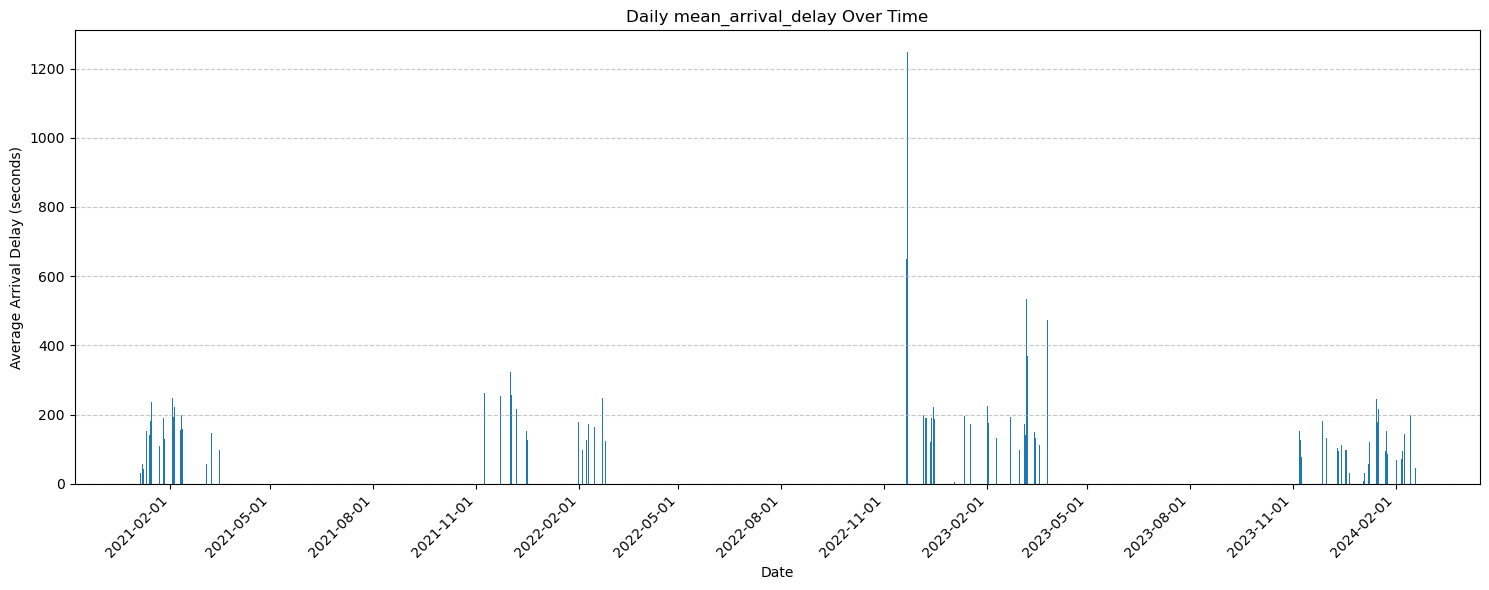

In [ ]:
delay_col = 'mean_arrival_delay'
date_col = 'date'

if date_col not in df_combined_weather.columns:
    print(f"Warning: Date column '{date_col}' not found.")
elif delay_col not in df_combined_weather.columns:
     print(f"Warning: Delay column '{delay_col}' not found.")
else:
     try:
        df_combined_weather[date_col] = pd.to_datetime(df_combined_weather[date_col])
        df_plot_time = df_combined_weather.sort_values(date_col)

        # Limit number of bars if too many days
        max_bars = 150
        if len(df_plot_time) > max_bars:
             print(f"Warning: Too many days ({len(df_plot_time)}) for a clear bar chart. Plotting first {max_bars}.")
             df_plot_time = df_plot_time.head(max_bars)

        # Plot using a bar chart
        plt.figure(figsize=(15, 6))
        plt.bar(df_plot_time[date_col], df_plot_time[delay_col], width=0.7) # Adjust width

        plt.title(f'Daily {delay_col} Over Time')
        plt.xlabel('Date')
        plt.ylabel(f'Average Arrival Delay (seconds)')
        plt.grid(True, axis='y', linestyle='--', alpha=0.7) # Grid on y-axis only often cleaner for bars

        # Formatting x-axis might require fewer ticks for bars
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # Adjust interval
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

     except Exception as e:
        print(f"Could not generate time series plot. Error: {e}")

Doesn't show anything our descriptive stats don't already - just wanted to confirm visually

Defining the 95th percentile as the mega delay days.

In [ ]:
percentile_95_threshold = df_combined_weather['mean_arrival_delay'].quantile(0.95)
print(f"95th percentile threshold for '{'mean_arrival_delay'}: {percentile_95_threshold:.8f}")

95th percentile threshold for 'mean_arrival_delay: 310.88865079


In [ ]:
final_mega_delay_df = df_combined_weather[df_combined_weather['mean_arrival_delay'] > percentile_95_threshold].copy()
print(f"Found {len(final_mega_delay_df)} days initially above the 95th percentile.")

Found 6 days initially above the 95th percentile.


In [ ]:
final_mega_delay_df.head(6)

date  temp  ground_code                      ground_expl  \
68 2021-12-02  -1.3           12  partial_snow_packed_wet_el_half   
76 2022-11-21   0.1           17          complete_snow_loose_dry   
77 2022-11-22   1.5           17          complete_snow_loose_dry   
87 2023-03-08  -3.1           17          complete_snow_loose_dry   
88 2023-03-09  -5.2           17          complete_snow_loose_dry   
89 2023-03-27  -3.9           17          complete_snow_loose_dry   

    prec_mm_total_24h  prec_mm_6h  snow_depth_cm  snow_depth_cm_accumulated  \
68                0.6         3.2            2.0                        2.0   
76               11.5         3.0           25.0                       11.0   
77                0.2         0.0           29.0                        4.0   
87                5.0         0.4           18.0                       17.0   
88                1.5         0.0           28.0                       10.0   
89                7.0         0.9            4.0                        3.0   

    month  day  year  dow   dow_name  holiday  mean_arrival_delay  \
68     12    2  2021    3   Thursday    False          323.167857   
76     11   21  2022    0     Monday    False          648.895963   
77     11   22  2022    1    Tuesday    False         1248.187643   
87      3    8  2023    2  Wednesday    False          533.194940   
88      3    9  2023    3   Thursday    False          369.018519   
89      3   27  2023    0     Monday    False          473.301471   

    mean_net_additional_delay  mean_abs_additional_delay  \
68                  16.505952                  39.251190   
76                  26.347826                  53.580745   
77                  55.102975                 121.894737   
87                  35.648810                  67.877976   
88                  13.648148                  45.746914   
89                   1.134804                  42.477941   

    mean_delay_recovery_index  
68                  22.745238  
76                  27.232919  
77                  63.748284  
87                  31.684524  
88                  32.098765  
89                  36.377451

In [ ]:
final_mega_delay_dates = final_mega_delay_df['date'].unique().tolist()
print(f"Final dates: {sorted([d.strftime('%Y-%m-%d') if hasattr(d, 'strftime') else str(d) for d in final_mega_delay_dates])}")

Final dates: ['2021-12-02', '2022-11-21', '2022-11-22', '2023-03-08', '2023-03-09', '2023-03-27']


Confirmed that these are all snow days. 2021-12-03 and 2023-03-28 were also snow days -- they were all pairs (except we don't have data for 2023-03-28 for some reason)

## Trip-level Analysis

In [ ]:
#Select the mega delay days from the all_trips.csv and create a new dataframe for the mega delay days
all_trip_filepath = './all_trip_data.csv'
df_all_trips = pd.read_csv(all_trip_filepath)
df_all_trips['date'] = pd.to_datetime(df_all_trips['date']).dt.date

try:
    target_dates_as_date_objects = [pd.to_datetime(d).date() for d in final_mega_delay_dates]
    print(f"Prepared target date list with {len(target_dates_as_date_objects)} date objects.")

except Exception as e:

    print(f"ERROR converting items in 'final_mega_delay_snow_dates' list to dates: {e}")
    exit()

df_mega_delay = df_all_trips[df_all_trips['date'].isin(target_dates_as_date_objects)].copy()
df_mega_delay.shape

Prepared target date list with 6 date objects.


(3649, 15)

Confirmed that the dataframe was filtered correctly with the number of rows in the CSV file when filtering for those 6 days.

In [ ]:
# map station ID's to station names -- reused from Marina's original file
url = "https://transport.integration.sl.se/v1/stop-points"
headers = {
    'accept': 'application/json',
    'Content-Type': 'application/json',
    'expand': 'true',
    'Accept-Encoding': 'identity'
}
r_data = requests.get(url,headers=headers).json()
df_sites= pd.json_normalize(r_data)

gid_to_name = df_sites.set_index('gid')['name'].to_dict()
df_mega_delay['stop_name'] = df_mega_delay['stop_id'].map(gid_to_name)
df_mega_delay.head()

trip_id  stop_sequence           stop_id  arrival_time  \
1988  14010000587423502              1  9022001010098003    1638423035   
1989  14010000587423502              2  9022001010627001    1638423113   
1990  14010000587423502              3  9022001010203002    1638423165   
1991  14010000587423502              4  9022001010045001    1638423274   
1992  14010000587423502              5  9022001010040001    1638423334   

      arrival_delay  arrival_uncertainty  departure_time  departure_delay  \
1988             35                  NaN      1638423035               35   
1989             54                  NaN      1638423117               58   
1990             66                  NaN      1638423213              114   
1991            123                  0.0      1638423274              123   
1992            111                  0.0      1638423334              111   

      departure_uncertainty  update_timestamp  trip_schedule_relationship  \
1988                    0.0        1638423275                           0   
1989                    NaN        1638423583                           0   
1990                    0.0        1638423275                           0   
1991                    0.0        1638423275                           0   
1992                    0.0        1638423583                           0   

            date           arrival_time_iso         arrival_time_local  \
1988  2021-12-02  2021-12-02 05:30:35+00:00  2021-12-02 06:30:35+01:00   
1989  2021-12-02  2021-12-02 05:31:53+00:00  2021-12-02 06:31:53+01:00   
1990  2021-12-02  2021-12-02 05:32:45+00:00  2021-12-02 06:32:45+01:00   
1991  2021-12-02  2021-12-02 05:34:34+00:00  2021-12-02 06:34:34+01:00   
1992  2021-12-02  2021-12-02 05:35:34+00:00  2021-12-02 06:35:34+01:00   

      trip_day_id     stop_name  
1988          196    Radiohuset  
1989          196    Garnisonen  
1990          196    Banérgatan  
1991          196    Värtavägen  
1992          196  Jungfrugatan

In [ ]:
#Check to see the list of stop names assigned
unique_stop_names = df_mega_delay['stop_name'].unique()

print(f"\n--- Unique Stop Names in '{'stop_name'}' Column ---")
if len(unique_stop_names) == 0:
    print("No unique stop names found (column might be empty or all NaN).")

else:
    print(f"Found {len(unique_stop_names)} unique stop names:")
    # Convert to list and sort alphabetically for easier reading
    unique_names_list_sorted = sorted([str(name) for name in unique_stop_names if pd.notna(name)])
    for name in unique_names_list_sorted:
        print(f"- {name}")


--- Unique Stop Names in 'stop_name' Column ---
Found 30 unique stop names:
- Banérgatan
- Dalagatan
- Eriksdal
- Fleminggatan
- Fridhemsplan
- Garnisonen
- Gullmarsplan
- Hornsgatan/Rosenlundsgatan
- Hornstull
- Högalidsgatan
- Jungfrugatan
- Mariebergsgatan
- Musikhögskolan
- Odengatan
- Odenplan
- Radiohuset
- Rosenlund
- Rosenlundsgatan
- Roslagsgatan
- S:t Eriksplan
- Skanstull
- Stadion
- Stadsbiblioteket
- Södra station
- Valhallavägen
- Varvsgatan
- Värtavägen
- Västerbroplan
- Zinkensdamm
- Östra station


There are some variations of names that could be collapsed on each other (e.g., Hornsgatan/Rosenlundsgatan, Rosenlund, Rosenlundsgatan). Also some that are not currently on the SL line 4 route (e.g., Jungfrugatan, Högalidsgatan, Mariebergsgatan) -- checked on Moovit that all of these stops have bus 4 listed as a nearby route.

In [ ]:
trip_lengths_daily = df_mega_delay.groupby(['date', 'trip_day_id'])['stop_sequence'].max().reset_index(name='max_sequence')
print("\nDistribution of Trip Lengths per Mega Day:")
print(trip_lengths_daily.groupby(['date'])['max_sequence'].value_counts())


Distribution of Trip Lengths per Mega Day:
date        max_sequence
2021-12-02  28              30
2022-11-21  23              28
2022-11-22  23              19
2023-03-08  24              28
2023-03-09  24              27
2023-03-27  24              17
Name: count, dtype: int64


In [ ]:
start_stop_dir1 = 'Radiohuset'
label_dir1 = 'Radiohuset_to_Gullmarsplan'

start_stop_dir2 = 'Gullmarsplan'
label_dir2 = 'Gullmarsplan_to_Radiohuset'

start_seq = 1

first_stops_df = df_mega_delay.loc[df_mega_delay.groupby('trip_id')['stop_sequence'].idxmin()]
trip_to_first_stop_info = first_stops_df.set_index('trip_id')[['stop_name', 'stop_sequence']].copy()

In [ ]:
#Need to match the stops within a unique trip ID to a given direction
#e.g., if the 1st stop is Radiohuset, then all the stops within that trip_id group should be named Radiohuset_to_Gullmarsplan

def get_direction_from_start(trip_id):
        first_stop_info = trip_to_first_stop_info.loc[trip_id] if trip_id in trip_to_first_stop_info.index else None
        if first_stop_info is None:
            return 'Unknown/Trip Missing'

        first_stop_name = first_stop_info['stop_name']
        first_stop_seq = first_stop_info['stop_sequence']

        if first_stop_name == start_stop_dir1 and first_stop_seq == start_seq:
            return label_dir1
        elif first_stop_name == start_stop_dir2 and first_stop_seq == start_seq:
            return label_dir2
        else:
            # Handle trips starting mid-route or unexpected start points
            return f'Other Start ({first_stop_name} Seq {first_stop_seq})'

In [ ]:
df_mega_delay['direction_label'] = df_mega_delay['trip_id'].map(get_direction_from_start)
print(df_mega_delay['direction_label'].value_counts())

direction_label
Radiohuset_to_Gullmarsplan    1858
Gullmarsplan_to_Radiohuset    1791
Name: count, dtype: int64


In [ ]:
print(df_mega_delay[['trip_id', 'stop_name', 'stop_id', 'stop_sequence', 'direction_label']].head(28))

                trip_id         stop_name           stop_id  stop_sequence  \
1988  14010000587423502        Radiohuset  9022001010098003              1   
1989  14010000587423502        Garnisonen  9022001010627001              2   
1990  14010000587423502        Banérgatan  9022001010203002              3   
1991  14010000587423502        Värtavägen  9022001010045001              4   
1992  14010000587423502      Jungfrugatan  9022001010040001              5   
1993  14010000587423502    Musikhögskolan  9022001010198001              6   
1994  14010000587423502           Stadion  9022001010199001              7   
1995  14010000587423502     Östra station  9022001010194006              8   
1996  14010000587423502         Odengatan  9022001010192001              9   
1997  14010000587423502      Roslagsgatan  9022001010191001             10   
1998  14010000587423502  Stadsbiblioteket  9022001010188001             11   
1999  14010000587423502          Odenplan  9022001010151002     

In [ ]:
df_mega_delay['arrival_time_local'].dtype

dtype('O')

In [ ]:
#df_mega_delay['arrival_time_local'] = pd.to_datetime(df_mega_delay['arrival_time_local'])
df_mega_delay['arrival_time_local'] = df_mega_delay['arrival_time_local'].str.replace(r'\+\d{2}:\d{2}$', '', regex=True)
df_mega_delay['arrival_time_local'] = pd.to_datetime(df_mega_delay['arrival_time_local'])
df_mega_delay.head()

trip_id  stop_sequence           stop_id  arrival_time  \
1988  14010000587423502              1  9022001010098003    1638423035   
1989  14010000587423502              2  9022001010627001    1638423113   
1990  14010000587423502              3  9022001010203002    1638423165   
1991  14010000587423502              4  9022001010045001    1638423274   
1992  14010000587423502              5  9022001010040001    1638423334   

      arrival_delay  arrival_uncertainty  departure_time  departure_delay  \
1988             35                  NaN      1638423035               35   
1989             54                  NaN      1638423117               58   
1990             66                  NaN      1638423213              114   
1991            123                  0.0      1638423274              123   
1992            111                  0.0      1638423334              111   

      departure_uncertainty  update_timestamp  trip_schedule_relationship  \
1988                    0.0        1638423275                           0   
1989                    NaN        1638423583                           0   
1990                    0.0        1638423275                           0   
1991                    0.0        1638423275                           0   
1992                    0.0        1638423583                           0   

            date           arrival_time_iso  arrival_time_local  trip_day_id  \
1988  2021-12-02  2021-12-02 05:30:35+00:00 2021-12-02 06:30:35          196   
1989  2021-12-02  2021-12-02 05:31:53+00:00 2021-12-02 06:31:53          196   
1990  2021-12-02  2021-12-02 05:32:45+00:00 2021-12-02 06:32:45          196   
1991  2021-12-02  2021-12-02 05:34:34+00:00 2021-12-02 06:34:34          196   
1992  2021-12-02  2021-12-02 05:35:34+00:00 2021-12-02 06:35:34          196   

         stop_name             direction_label  
1988    Radiohuset  Radiohuset_to_Gullmarsplan  
1989    Garnisonen  Radiohuset_to_Gullmarsplan  
1990    Banérgatan  Radiohuset_to_Gullmarsplan  
1991    Värtavägen  Radiohuset_to_Gullmarsplan  
1992  Jungfrugatan  Radiohuset_to_Gullmarsplan

In [ ]:
df_mega_delay['arrival_time_local'].dtype

dtype('<M8[ns]')

In [ ]:
df_mega_delay['arrival_time_iso'] = pd.to_datetime(df_mega_delay['arrival_time_iso'])

In [ ]:
df_mega_delay['arrival_time_iso'].dtype

datetime64[ns, UTC]

## Route Graphs per Mega Delay Day (Cumulative)

Found 6 unique mega delay dates in the subset.
Dates to process: [datetime.date(2021, 12, 2), datetime.date(2022, 11, 21), datetime.date(2022, 11, 22), datetime.date(2023, 3, 8), datetime.date(2023, 3, 9), datetime.date(2023, 3, 27)]

--- Generating Plot for Date: 2021-12-02, Direction: Radiohuset_to_Gullmarsplan ---
  Analyzing 15 trips found.


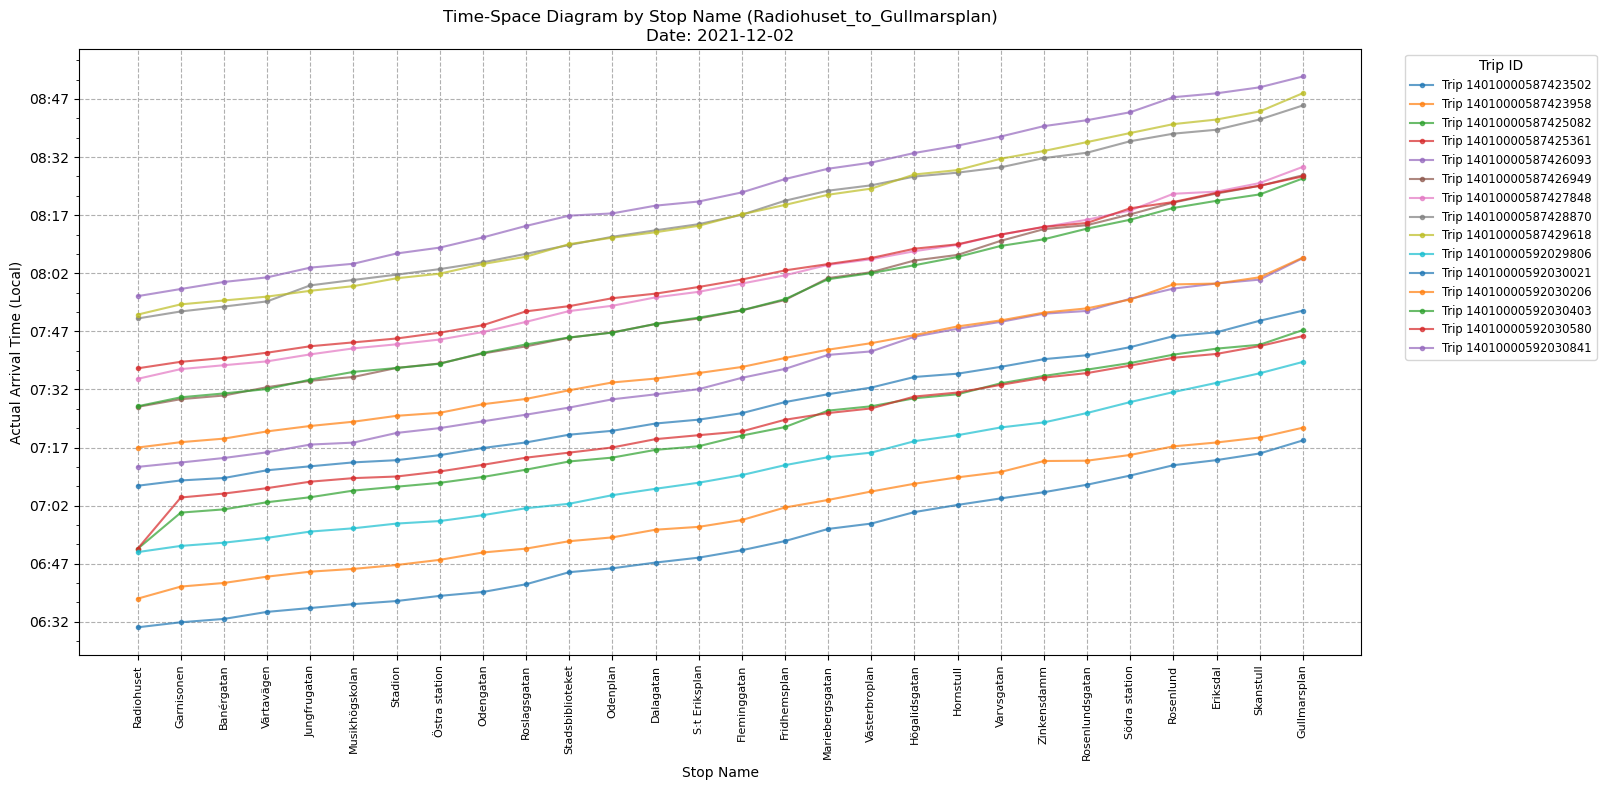


--- Generating Plot for Date: 2022-11-21, Direction: Radiohuset_to_Gullmarsplan ---
  Analyzing 13 trips found.


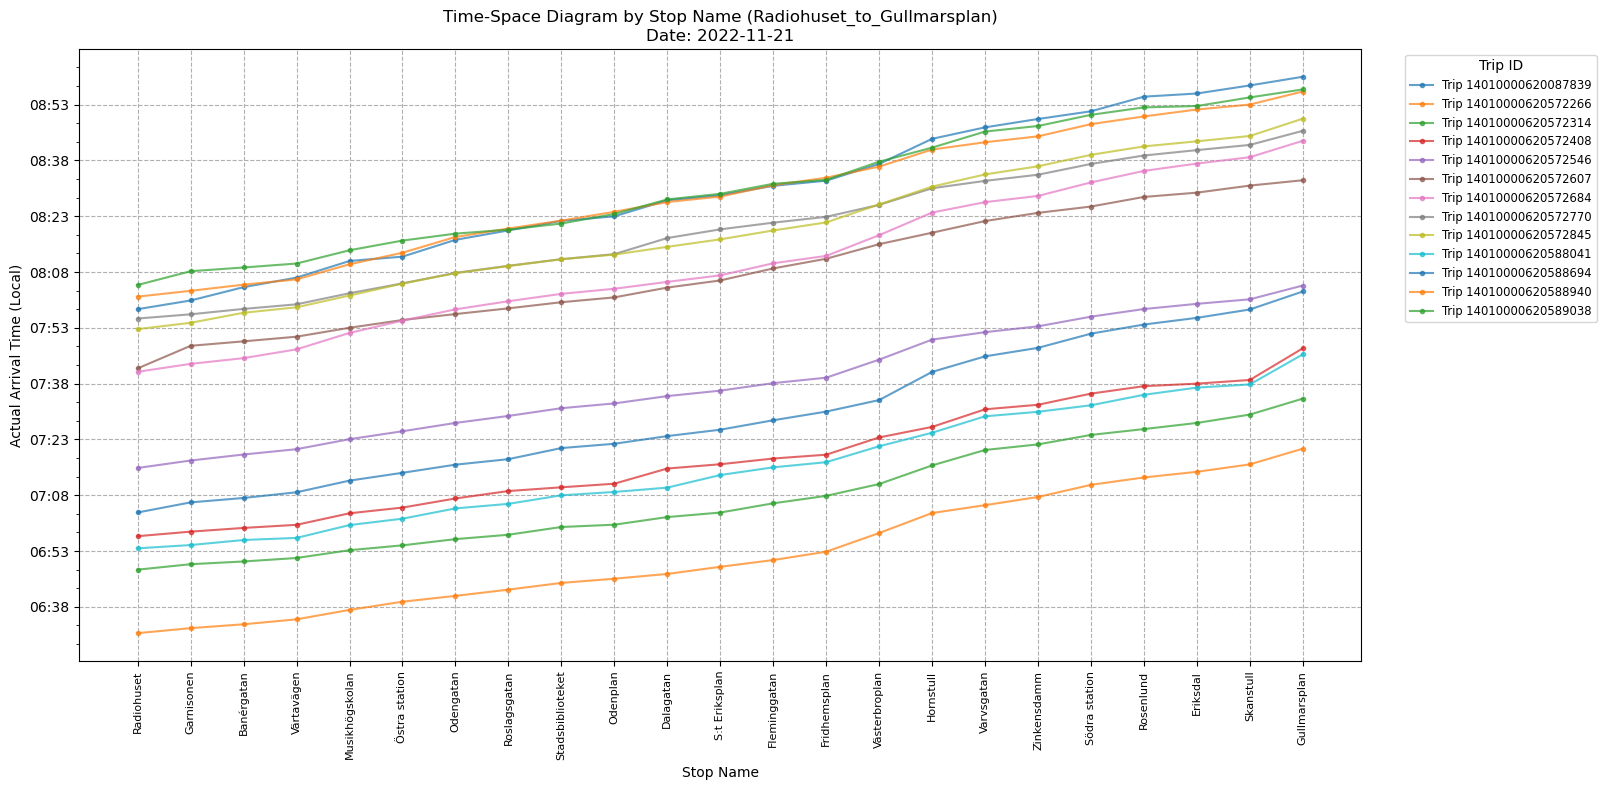


--- Generating Plot for Date: 2022-11-22, Direction: Radiohuset_to_Gullmarsplan ---
  Analyzing 13 trips found.


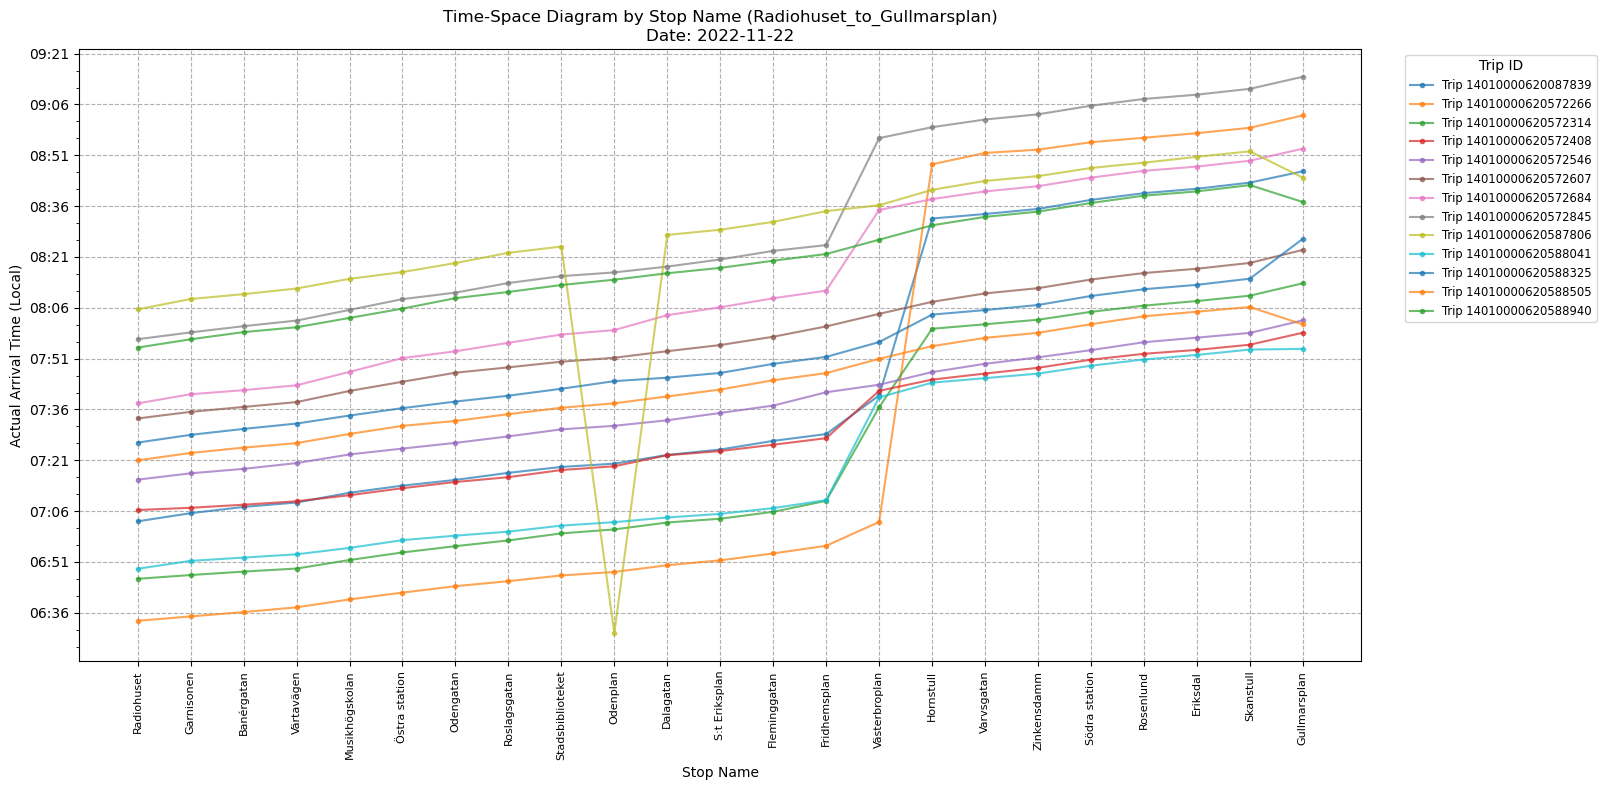


--- Generating Plot for Date: 2023-03-08, Direction: Radiohuset_to_Gullmarsplan ---
  Analyzing 12 trips found.


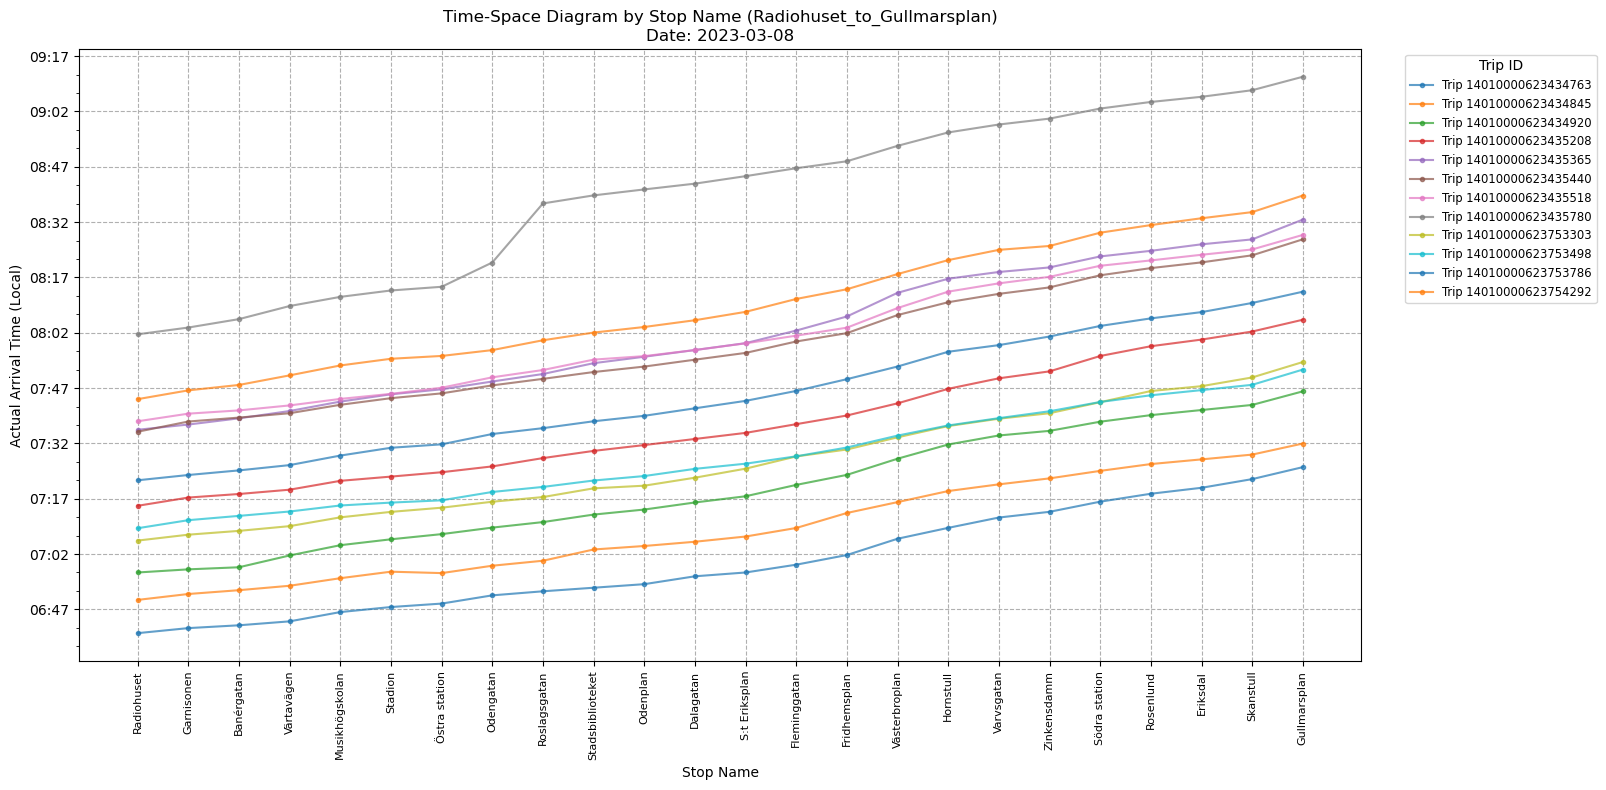


--- Generating Plot for Date: 2023-03-09, Direction: Radiohuset_to_Gullmarsplan ---
  Analyzing 14 trips found.


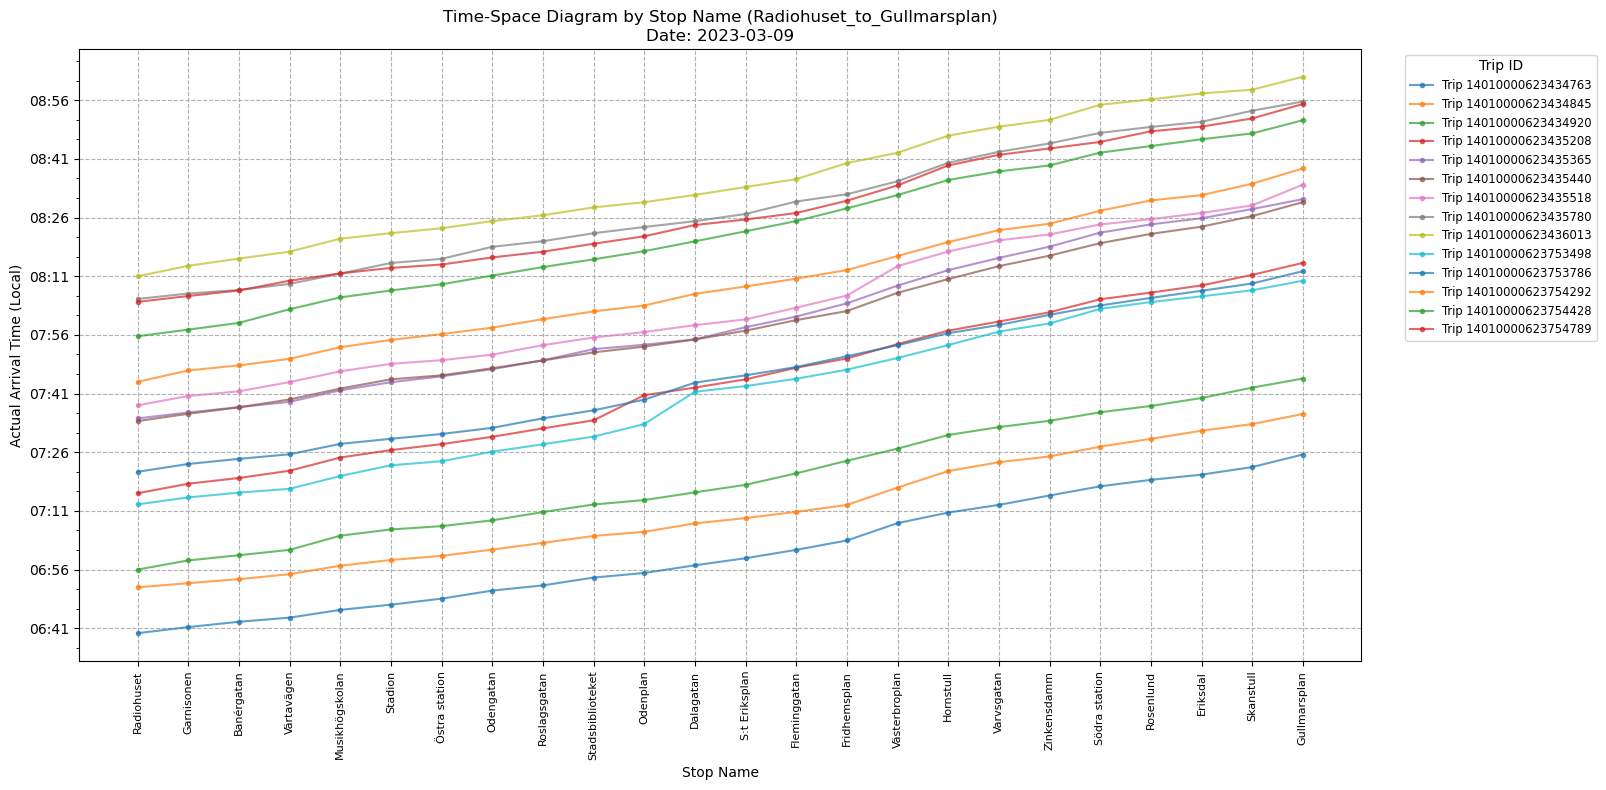


--- Generating Plot for Date: 2023-03-27, Direction: Radiohuset_to_Gullmarsplan ---
  Analyzing 9 trips found.


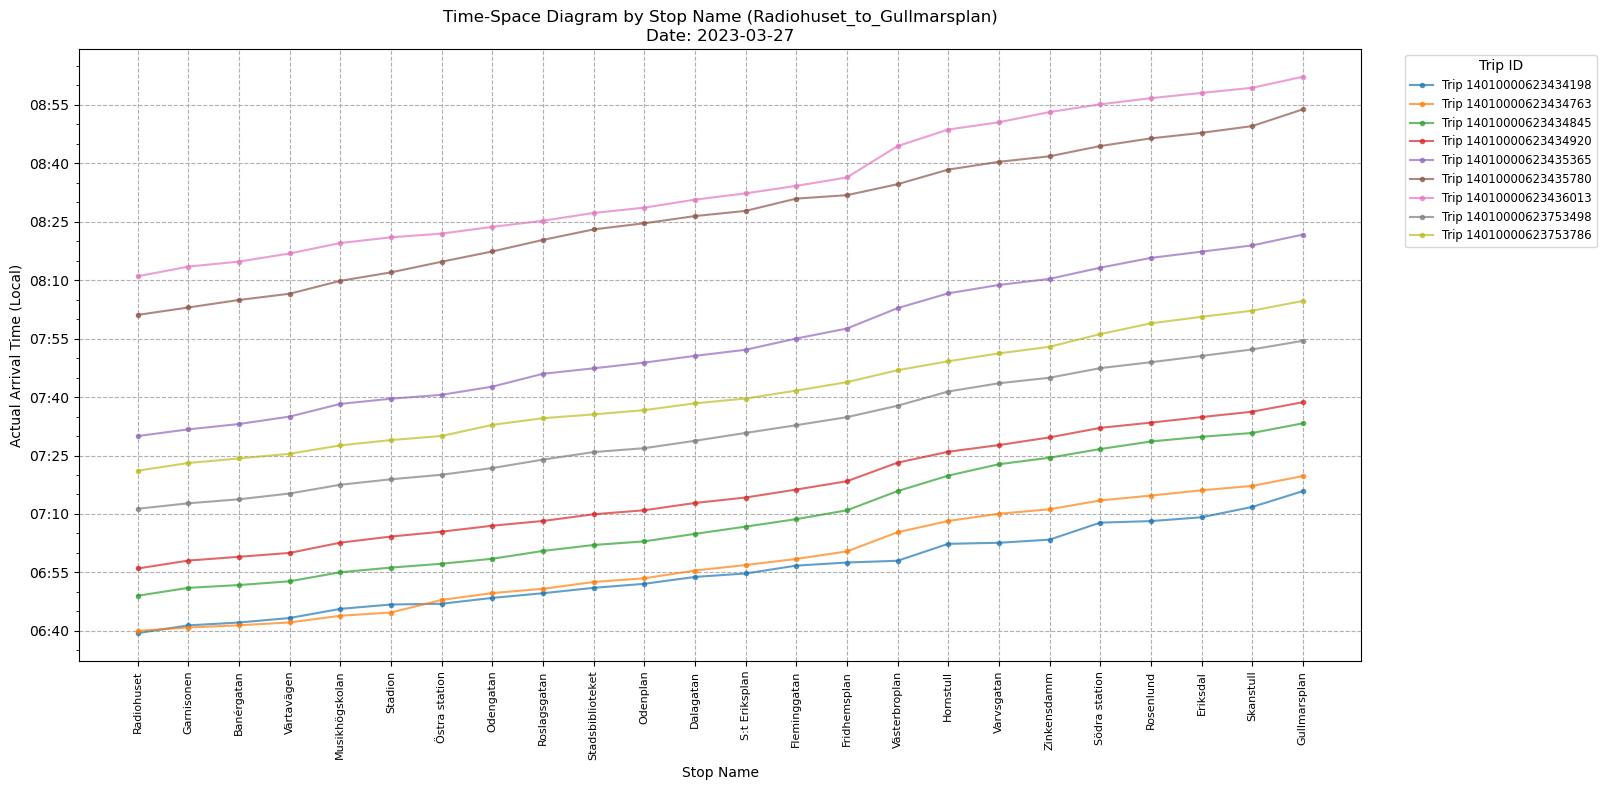

In [ ]:
# --- 1. Define Columns and Target Direction ---
trip_col = 'trip_id'
stop_seq_col = 'stop_sequence'
stop_name_col = 'stop_name' # <-- Will use this for X-axis
time_col = 'arrival_time_local' # Timezone-aware datetime column
direction_label_col = 'direction_label'
date_info_col = 'date' # Date object column

# The specific direction label you want to plot
target_direction = 'Radiohuset_to_Gullmarsplan' # <-- Changed direction

# --- 2. Initial Checks ---
required_cols = [date_info_col, trip_col, stop_seq_col, stop_name_col, time_col, direction_label_col]
if df_mega_delay.empty:
    print("Cannot proceed: DataFrame df_mega_delay_subset is empty.")
elif not all(col in df_mega_delay.columns for col in required_cols):
    missing = [col for col in required_cols if col not in df_mega_delay.columns]
    print(f"Error: DataFrame is missing one or more required columns: {missing}")
elif not pd.api.types.is_datetime64_any_dtype(df_mega_delay[time_col]):
     print(f"Error: Time column '{time_col}' does not contain datetime objects.")
elif df_mega_delay[stop_name_col].isnull().any():
     print(f"Warning: There are missing values in the '{stop_name_col}' column. Rows with missing names won't be plotted correctly on X-axis.")
else:
    # --- 3. Get Unique Dates from the Subset ---
    unique_mega_dates = sorted(df_mega_delay[date_info_col].unique())
    print(f"Found {len(unique_mega_dates)} unique mega delay dates in the subset.")
    print(f"Dates to process: {unique_mega_dates}")

    # check the values in arrival_time_local col
    #print(df_mega_delay[df_mega_delay['trip_id'] == 14010000592030250][time_col])

    # --- 4. Loop Through Each Date ---
    for current_date in unique_mega_dates:
        date_str = current_date.strftime('%Y-%m-%d') if hasattr(current_date, 'strftime') else str(current_date)
        print(f"\n--- Generating Plot for Date: {date_str}, Direction: {target_direction} ---")

        # a) Filter for the current date
        df_single_day_loop = df_mega_delay[df_mega_delay[date_info_col] == current_date].copy()

        # b) Filter for the target direction
        df_direction_trips_loop = df_single_day_loop[df_single_day_loop[direction_label_col] == target_direction].copy()

        if df_direction_trips_loop.empty:
            print(f"  No trips found for direction '{target_direction}' on {date_str}.")
            continue

        # c) Get Unique Trip IDs for this Direction/Day
        unique_trips_loop = df_direction_trips_loop[trip_col].unique()
        print(f"  Analyzing {len(unique_trips_loop)} trips found.")

        # --- d) Determine the common sequence of stop names for plotting order ---
        # Find the most frequent path (sequence of names) for this direction on this day
        # This helps establish a sensible order for the x-axis
        stop_order_df = df_direction_trips_loop.sort_values([trip_col, stop_seq_col])[[stop_name_col, stop_seq_col]].drop_duplicates()
        # Get the mode sequence - the most common path taken
        # This is complex, let's approximate by taking the path of the trip with the most stops
        trip_counts = stop_order_df.groupby(stop_name_col).size()
        most_stops_trip_id = df_direction_trips_loop.groupby(trip_col).size().idxmax()
        ordered_stop_names = df_direction_trips_loop[df_direction_trips_loop[trip_col]==most_stops_trip_id].sort_values(stop_seq_col)[stop_name_col].unique().tolist()
        if not ordered_stop_names: # Fallback if the longest trip had issues
             ordered_stop_names = df_direction_trips_loop.sort_values(stop_seq_col)[stop_name_col].unique().tolist()


        # Convert stop names to categorical type with the determined order
        # This ensures the x-axis plots in the route order, not alphabetical
        df_direction_trips_loop[stop_name_col] = pd.Categorical(
            df_direction_trips_loop[stop_name_col],
            categories=ordered_stop_names,
            ordered=True
        )

        # --- e) Visualize Time vs Stop Name ---
        fig, ax = plt.subplots(figsize=(18, 8)) # Wider figure for stop names


        # Plot each trip
        for trip_id_val in unique_trips_loop:
            # Important: Sort by the CATEGORICAL stop name now to plot points in order
            trip_data = df_direction_trips_loop[df_direction_trips_loop[trip_col] == trip_id_val].sort_values(stop_name_col)
            if not trip_data.empty:
                trip_label = str(trip_id_val)
                ax.plot(
                    trip_data[stop_name_col].astype(str), # X-axis = Stop Name (convert category to string for plotting)
                    trip_data[time_col],               # Y-axis = Actual Arrival Time (Local)
                    marker='.',
                    linestyle='-',
                    alpha=0.7,
                    label=f'Trip {trip_label}' if len(unique_trips_loop) <= 20 else None
                )

        # --- f) Add Plot Details ---
        ax.set_title(f'Time-Space Diagram by Stop Name ({target_direction})\nDate: {date_str}')
        ax.set_xlabel('Stop Name')
        ax.set_ylabel('Actual Arrival Time (Local)')
        ax.grid(True, linestyle='--')

        # Rotate x-axis labels heavily for stop names
        plt.xticks(rotation=90, ha='center', fontsize=8) # Adjust fontsize as needed


        local_tz = pytz.timezone('Europe/Stockholm')  # or 'UTC+1', but use a named timezone if possible
        # Format y-axis for time with 15-minute intervals
        #ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz = local_tz))
        ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=15)) # Major ticks every 15 mins
        ax.yaxis.set_minor_locator(mdates.MinuteLocator(interval=5)) # Optional minor ticks

        if len(unique_trips_loop) <= 20:
            ax.legend(title="Trip ID", bbox_to_anchor=(1.03, 1), loc='upper left', fontsize='small') # Adjust legend position slightly
            fig.tight_layout(rect=[0, 0, 0.90, 1]) # Adjust layout further for legend/labels
        else:
            print("  Info: More than 20 trips found, omitting individual trip labels.")
            fig.tight_layout()

        plt.show() # Show plot for the current date

# Final message if the initial checks failed
if 'unique_mega_dates' not in locals():
    print("\nPlotting loop did not run due to initial errors or empty DataFrame.")

Found 6 unique mega delay dates in the subset.
Dates to process: [datetime.date(2021, 12, 2), datetime.date(2022, 11, 21), datetime.date(2022, 11, 22), datetime.date(2023, 3, 8), datetime.date(2023, 3, 9), datetime.date(2023, 3, 27)]

--- Generating Plot for Date: 2021-12-02, Direction: Gullmarsplan_to_Radiohuset ---
  Analyzing 15 trips found.


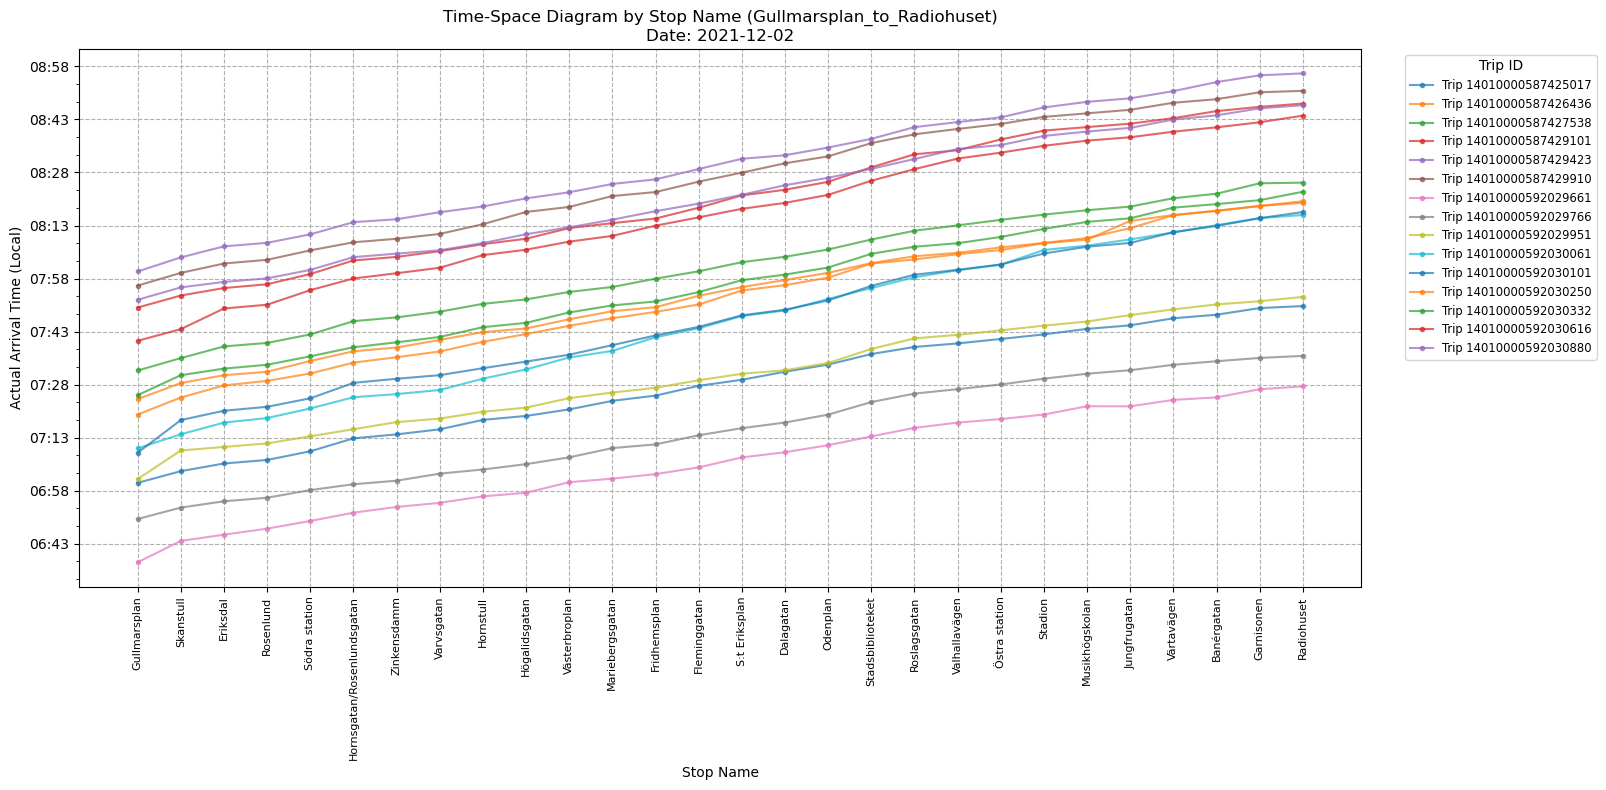


--- Generating Plot for Date: 2022-11-21, Direction: Gullmarsplan_to_Radiohuset ---
  Analyzing 15 trips found.


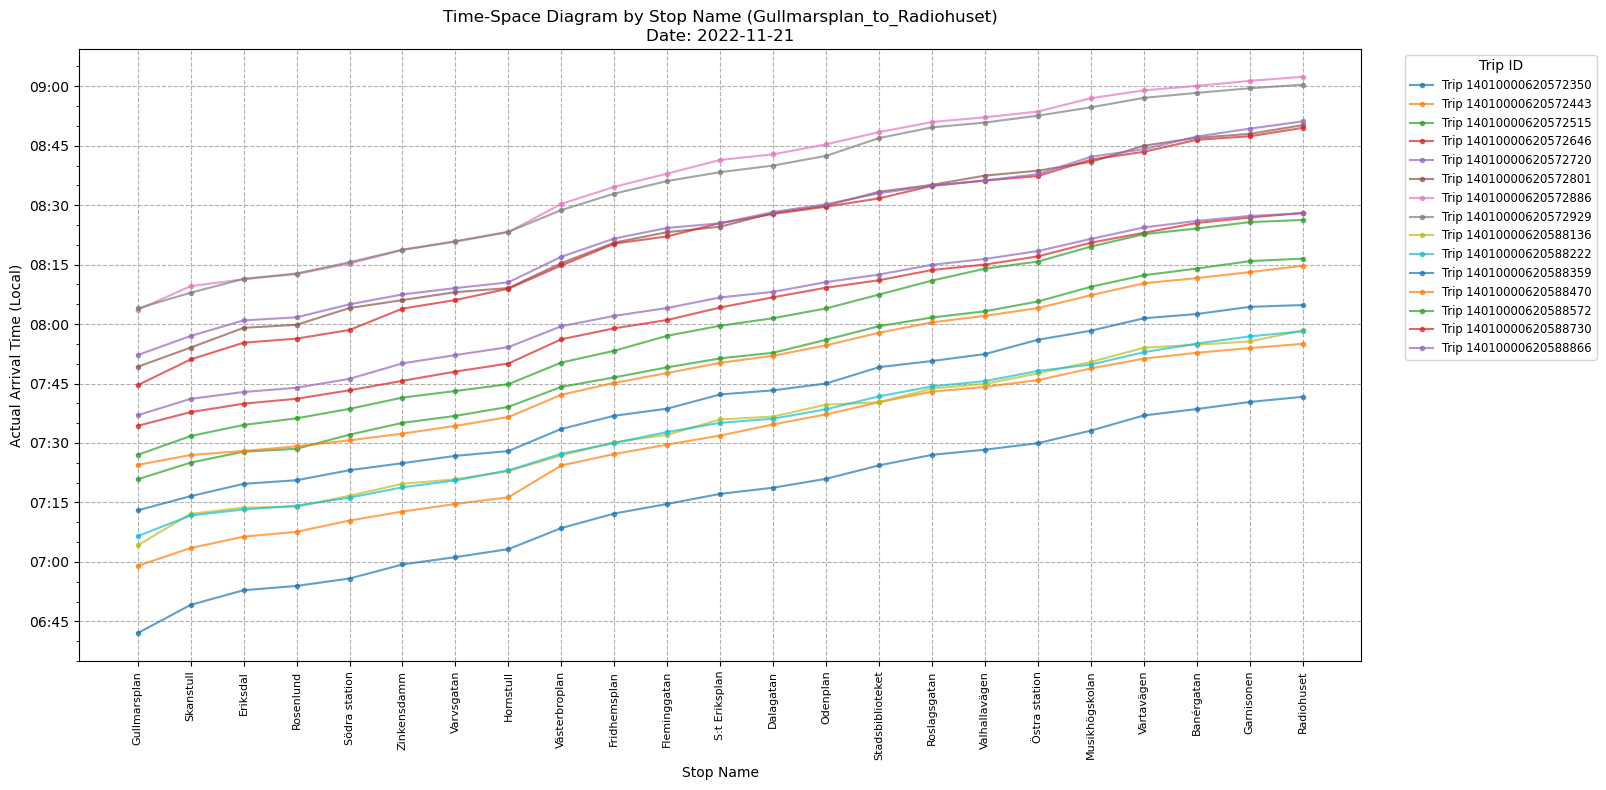


--- Generating Plot for Date: 2022-11-22, Direction: Gullmarsplan_to_Radiohuset ---
  Analyzing 6 trips found.


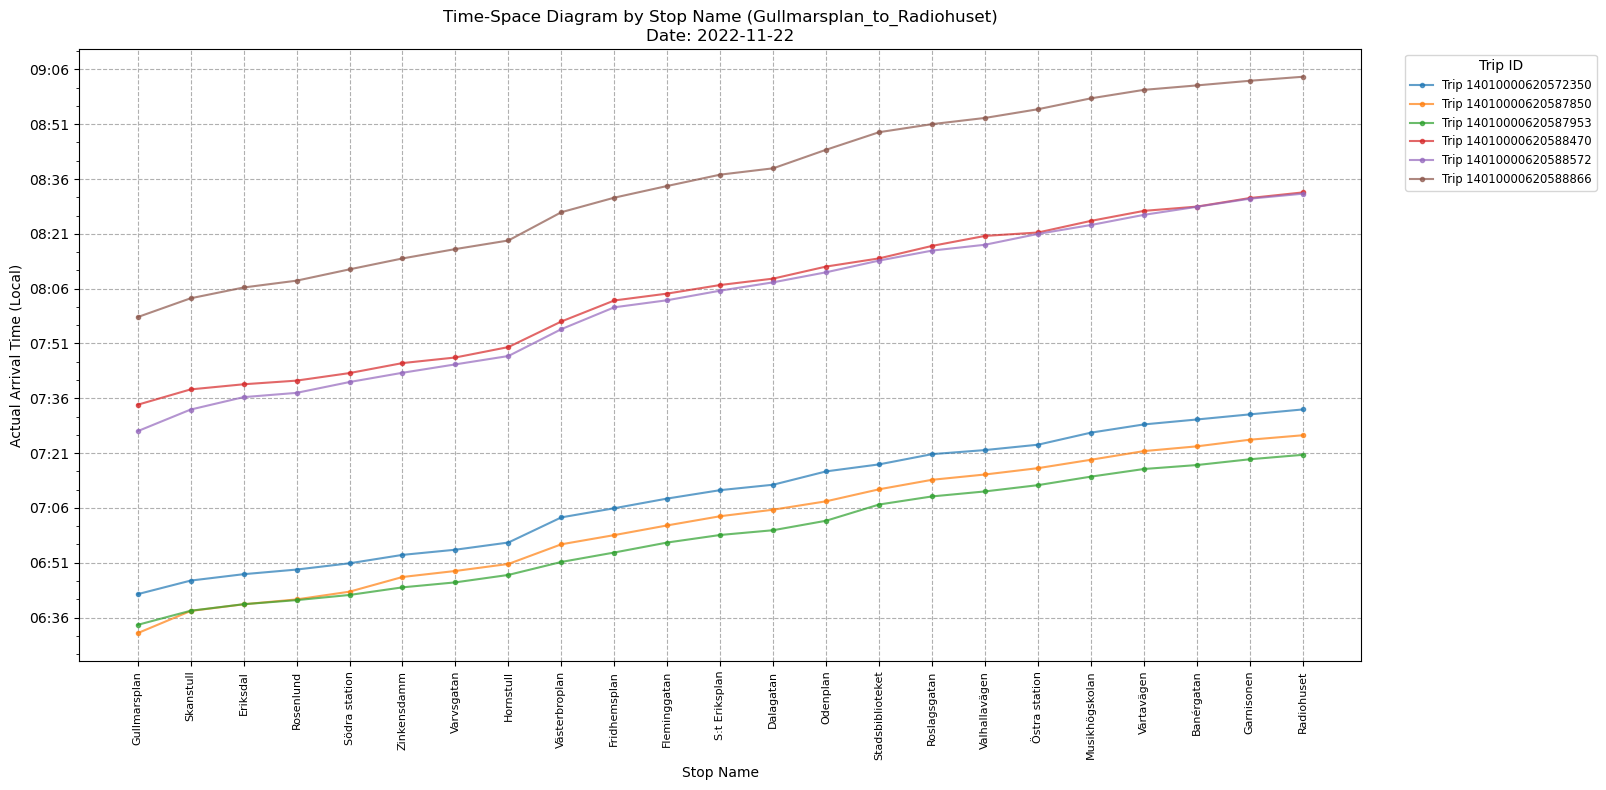


--- Generating Plot for Date: 2023-03-08, Direction: Gullmarsplan_to_Radiohuset ---
  Analyzing 16 trips found.


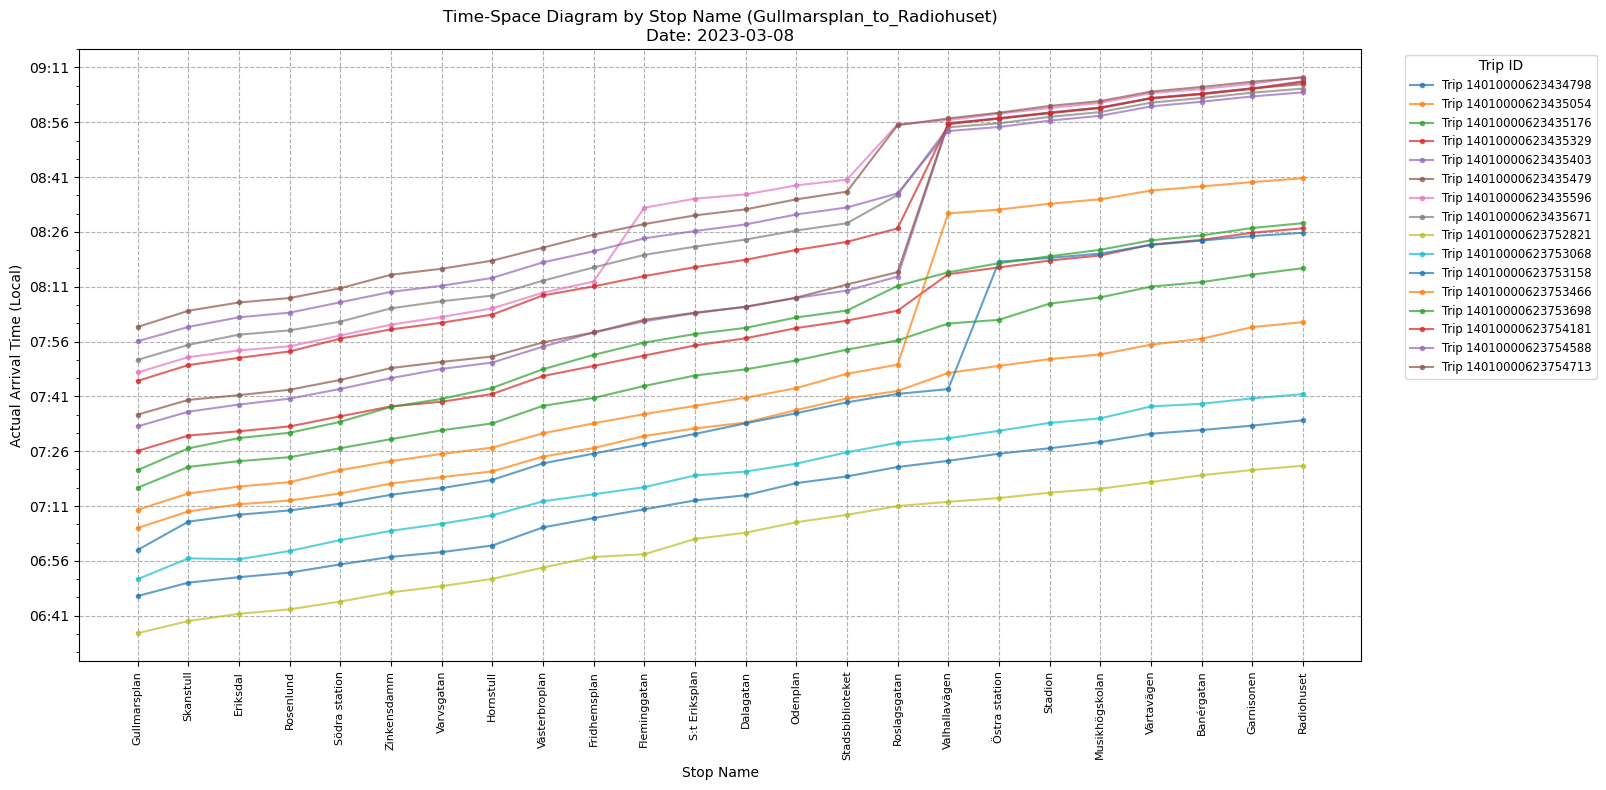


--- Generating Plot for Date: 2023-03-09, Direction: Gullmarsplan_to_Radiohuset ---
  Analyzing 13 trips found.


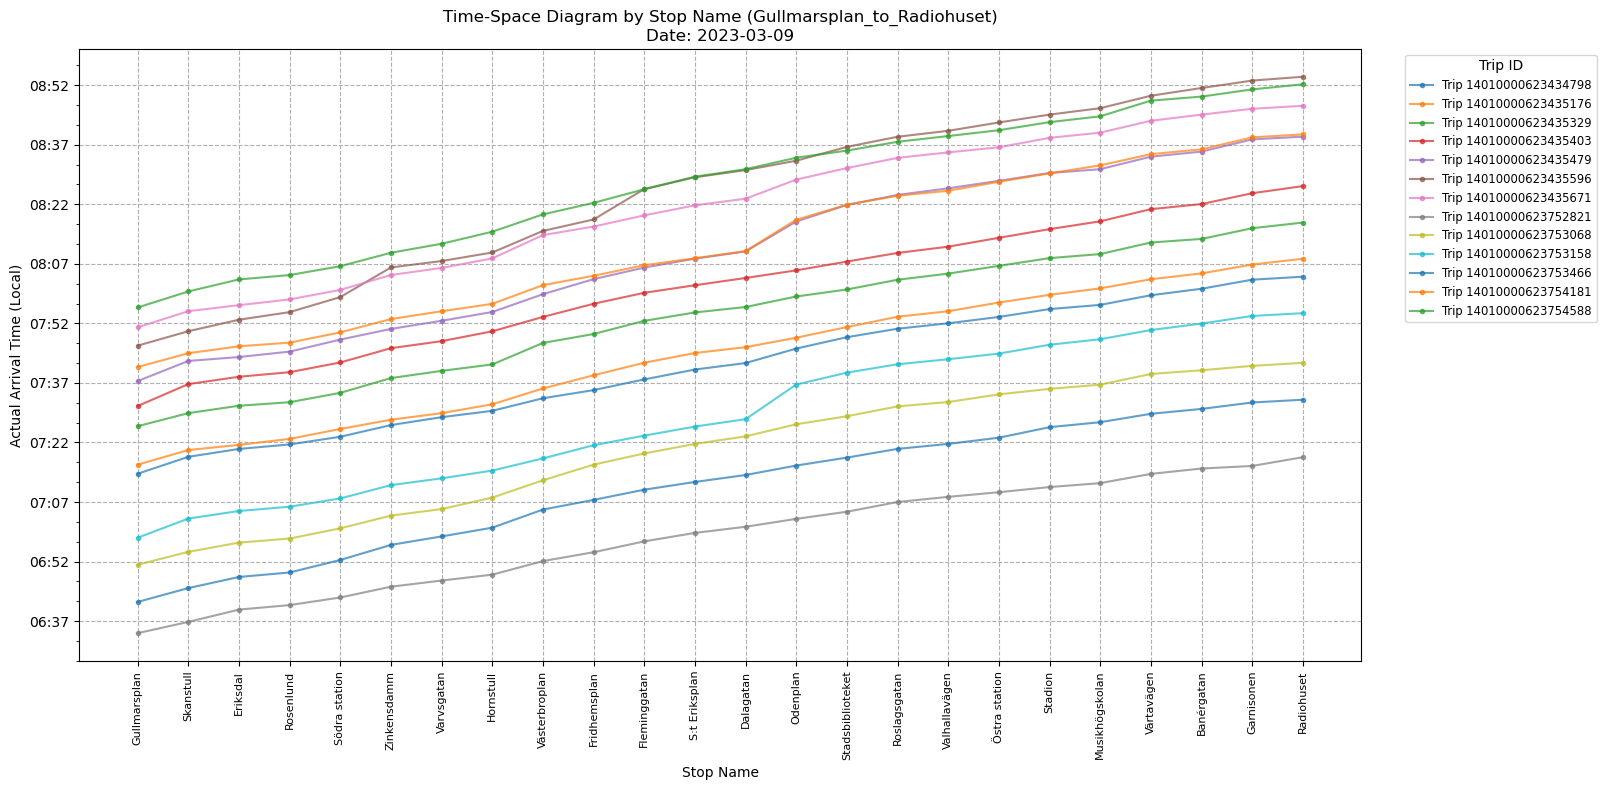


--- Generating Plot for Date: 2023-03-27, Direction: Gullmarsplan_to_Radiohuset ---
  Analyzing 8 trips found.


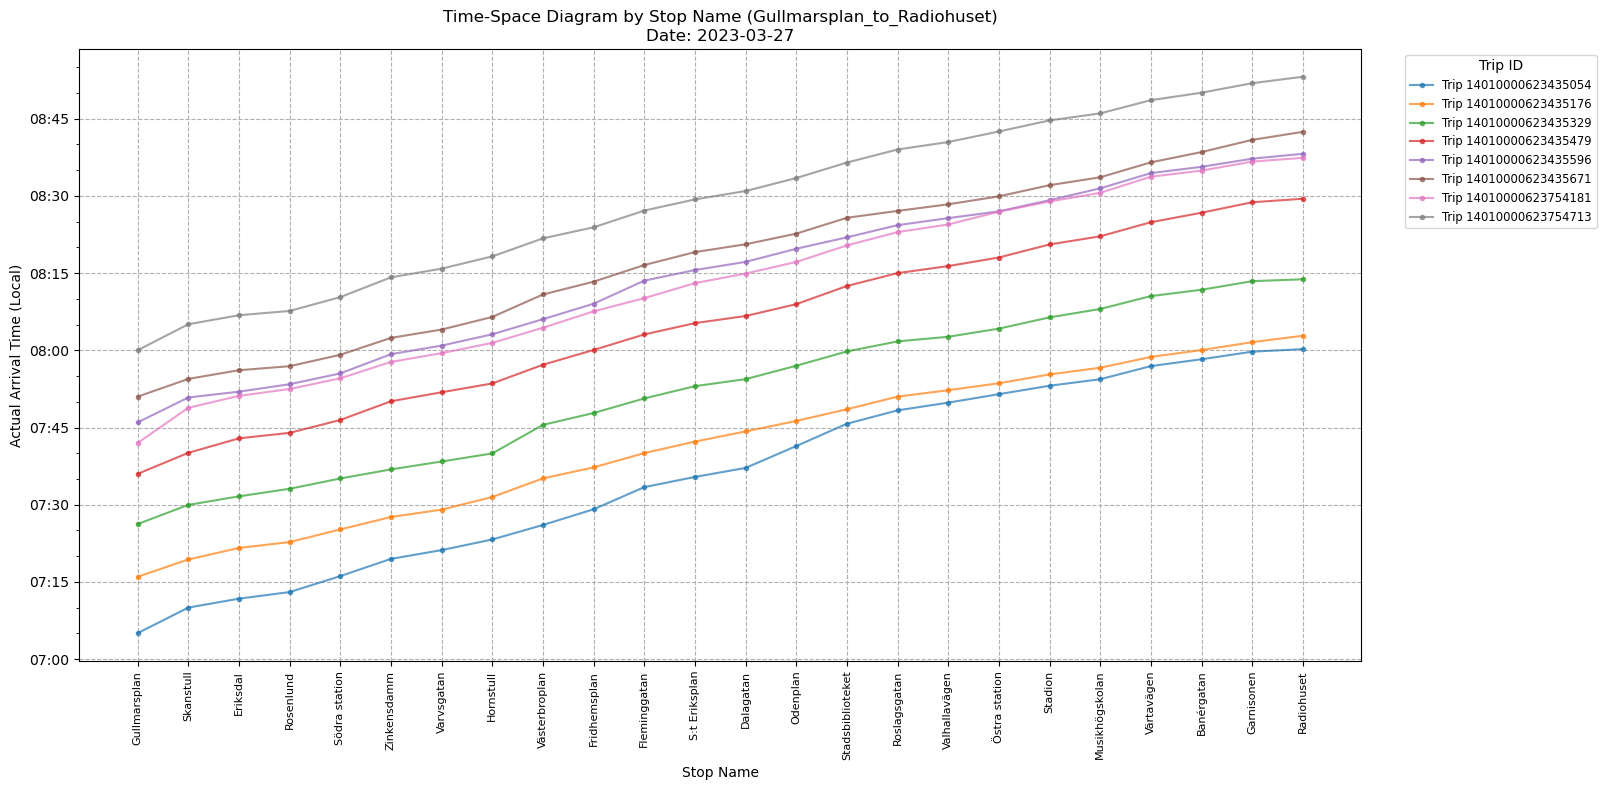

In [ ]:
# --- 1. Define Columns and Target Direction ---
trip_col = 'trip_id'
stop_seq_col = 'stop_sequence'
stop_name_col = 'stop_name' # <-- Will use this for X-axis
time_col = 'arrival_time_local' # Timezone-aware datetime column
direction_label_col = 'direction_label'
date_info_col = 'date' # Date object column

# The specific direction label you want to plot
target_direction = 'Gullmarsplan_to_Radiohuset' # <-- Changed direction

# --- 2. Initial Checks ---
required_cols = [date_info_col, trip_col, stop_seq_col, stop_name_col, time_col, direction_label_col]
if df_mega_delay.empty:
    print("Cannot proceed: DataFrame df_mega_delay_subset is empty.")
elif not all(col in df_mega_delay.columns for col in required_cols):
    missing = [col for col in required_cols if col not in df_mega_delay.columns]
    print(f"Error: DataFrame is missing one or more required columns: {missing}")
elif not pd.api.types.is_datetime64_any_dtype(df_mega_delay[time_col]):
     print(f"Error: Time column '{time_col}' does not contain datetime objects.")
elif df_mega_delay[stop_name_col].isnull().any():
     print(f"Warning: There are missing values in the '{stop_name_col}' column. Rows with missing names won't be plotted correctly on X-axis.")
else:
    # --- 3. Get Unique Dates from the Subset ---
    unique_mega_dates = sorted(df_mega_delay[date_info_col].unique())
    print(f"Found {len(unique_mega_dates)} unique mega delay dates in the subset.")
    print(f"Dates to process: {unique_mega_dates}")

    # --- 4. Loop Through Each Date ---
    for current_date in unique_mega_dates:
        date_str = current_date.strftime('%Y-%m-%d') if hasattr(current_date, 'strftime') else str(current_date)
        print(f"\n--- Generating Plot for Date: {date_str}, Direction: {target_direction} ---")

        # a) Filter for the current date
        df_single_day_loop = df_mega_delay[df_mega_delay[date_info_col] == current_date].copy()

        # b) Filter for the target direction
        df_direction_trips_loop = df_single_day_loop[df_single_day_loop[direction_label_col] == target_direction].copy()

        if df_direction_trips_loop.empty:
            print(f"  No trips found for direction '{target_direction}' on {date_str}.")
            continue

        # c) Get Unique Trip IDs for this Direction/Day
        unique_trips_loop = df_direction_trips_loop[trip_col].unique()
        print(f"  Analyzing {len(unique_trips_loop)} trips found.")

        # --- d) Determine the common sequence of stop names for plotting order ---
        # Find the most frequent path (sequence of names) for this direction on this day --- NOT SURE IF THIS IS SOUND???
        stop_order_df = df_direction_trips_loop.sort_values([trip_col, stop_seq_col])[[stop_name_col, stop_seq_col]].drop_duplicates()
        # Get the mode sequence - the most common path taken
        trip_counts = stop_order_df.groupby(stop_name_col).size()
        most_stops_trip_id = df_direction_trips_loop.groupby(trip_col).size().idxmax()
        ordered_stop_names = df_direction_trips_loop[df_direction_trips_loop[trip_col]==most_stops_trip_id].sort_values(stop_seq_col)[stop_name_col].unique().tolist()
        if not ordered_stop_names: # Fallback if the longest trip had issues
             ordered_stop_names = df_direction_trips_loop.sort_values(stop_seq_col)[stop_name_col].unique().tolist()


        # Convert stop names to categorical type with the determined order
        # This ensures the x-axis plots in the route order, not alphabetical
        df_direction_trips_loop[stop_name_col] = pd.Categorical(
            df_direction_trips_loop[stop_name_col],
            categories=ordered_stop_names,
            ordered=True
        )

        # --- e) Visualize Time vs Stop Name ---
        fig, ax = plt.subplots(figsize=(18, 8)) # Wider figure for stop names

        # Plot each trip
        for trip_id_val in unique_trips_loop:
            # Important: Sort by the CATEGORICAL stop name now to plot points in order
            trip_data = df_direction_trips_loop[df_direction_trips_loop[trip_col] == trip_id_val].sort_values(stop_name_col)
            if not trip_data.empty:
                trip_label = str(trip_id_val)
                ax.plot(
                    trip_data[stop_name_col].astype(str), # X-axis = Stop Name (convert category to string for plotting)
                    trip_data[time_col],               # Y-axis = Actual Arrival Time (Local)
                    marker='.',
                    linestyle='-',
                    alpha=0.7,
                    label=f'Trip {trip_label}' if len(unique_trips_loop) <= 20 else None
                )

        # --- f) Add Plot Details ---
        ax.set_title(f'Time-Space Diagram by Stop Name ({target_direction})\nDate: {date_str}')
        ax.set_xlabel('Stop Name')
        ax.set_ylabel('Actual Arrival Time (Local)')
        ax.grid(True, linestyle='--')

        # Rotate x-axis labels heavily for stop names
        plt.xticks(rotation=90, ha='center', fontsize=8) # Adjust fontsize as needed

        # Format y-axis for time with 15-minute intervals
        #ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz = local_tz))
        ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=15)) # Major ticks every 15 mins
        ax.yaxis.set_minor_locator(mdates.MinuteLocator(interval=5)) # Optional minor ticks

        if len(unique_trips_loop) <= 20:
            ax.legend(title="Trip ID", bbox_to_anchor=(1.03, 1), loc='upper left', fontsize='small') # Adjust legend position slightly
            fig.tight_layout(rect=[0, 0, 0.90, 1]) # Adjust layout further for legend/labels
        else:
            print("  Info: More than 20 trips found, omitting individual trip labels.")
            fig.tight_layout()

        plt.show() # Show plot for the current date

# Final message if the initial checks failed
if 'unique_mega_dates' not in locals():
    print("\nPlotting loop did not run due to initial errors or empty DataFrame.")

Increasing slope suggests accumulating delay as time goes on. Space between the lines represent the headway. Need to check how many of these trips already started delayed.

## Mega Delay Day (Highlighting Origin Delay)

This is only looking at the arrival_delay column (e.g., it is possible that the bus arrived on time to the first stop, but left it delayed)

In [ ]:
# --- Define Columns ---
trip_col = 'trip_id'
date_info_col = 'date'
direction_label_col = 'direction_label'
origin_delay_col = 'origin_delay'

df_to_use = df_mega_delay

# --- Initialize proceed_analysis ---
proceed_analysis = False # Default to False

# --- 1. Ensure 'origin_delay' column exists ---
if origin_delay_col not in df_to_use.columns:
    print(f"Calculating '{origin_delay_col}' column as it was not found...")
    arrival_delay_col_temp = 'arrival_delay'
    stop_seq_col_temp = 'stop_sequence'
    if trip_col in df_to_use.columns and arrival_delay_col_temp in df_to_use.columns and stop_seq_col_temp in df_to_use.columns:
        df_to_use[arrival_delay_col_temp] = pd.to_numeric(df_to_use[arrival_delay_col_temp], errors='coerce')

        # Sort by trip_id and stop_sequence (ensures the first stop in a trip is properly identified)
        df_to_use_sorted = df_to_use.sort_values([trip_col, stop_seq_col_temp])

        # Calculate origin delay by grouping by both trip_id and date
        df_to_use[origin_delay_col] = df_to_use_sorted.groupby([trip_col, date_info_col])[arrival_delay_col_temp].transform(
            lambda x: x.iloc[0] if not x.empty and pd.notna(x.iloc[0]) else np.nan
        )
        print(f"'{origin_delay_col}' calculated.")
        proceed_analysis = True # Set to True if calculation is successful
    else:
        print(f"Error: Cannot calculate '{origin_delay_col}'. Missing necessary columns.")
        # proceed_analysis remains False
else:
    print(f"'{origin_delay_col}' column already exists.")
    proceed_analysis = True # Column exists, so we can proceed

# --- 2. Initial Checks for Table Generation ---
required_cols_for_table = [date_info_col, trip_col, direction_label_col, origin_delay_col]
if not proceed_analysis: # Now 'proceed_analysis' will always be defined
    print("Cannot proceed with table generation due to missing or uncalculable origin_delay.")
elif df_to_use.empty:
    print("Cannot proceed: DataFrame is empty.")
elif not all(col in df_to_use.columns for col in required_cols_for_table):
    missing_cols = [col for col in required_cols_for_table if col not in df_to_use.columns]
    print(f"Error: DataFrame is missing one or more required columns for table: {missing_cols}")
else:
    # --- 3. Get Unique Dates and Directions ---
    unique_mega_dates = sorted(df_to_use[date_info_col].unique())
    unique_directions = df_to_use[direction_label_col].unique()
    directions_to_analyze = [d for d in unique_directions if "Other Start" not in str(d) and "Unknown" not in str(d)]
    if not directions_to_analyze: directions_to_analyze = unique_directions

    print(f"\n--- Trips NOT Starting Exactly On Time (Origin Delay != 0) ---")

    # --- 4. Loop Through Each Date AND Each Direction ---
    for current_date in unique_mega_dates:
        date_str = current_date.strftime('%Y-%m-%d') if hasattr(current_date, 'strftime') else str(current_date)
        print(f"\n========== DATE: {date_str} ==========")

        df_single_day_loop = df_to_use[df_to_use[date_info_col] == current_date].copy()
        if df_single_day_loop.empty: continue

        for current_direction in directions_to_analyze:
            print(f"\n----- Direction: {current_direction} -----")

            df_direction_loop = df_single_day_loop[
                df_single_day_loop[direction_label_col] == current_direction
            ].copy()

            if df_direction_loop.empty:
                print("  No trips found for this direction.")
                continue

            trip_origin_info = df_direction_loop.drop_duplicates(subset=[trip_col], keep='first')

            # Filter for trips where origin_delay is NOT EQUAL to 0
            off_schedule_start_trips = trip_origin_info[
                trip_origin_info[origin_delay_col] != 0
            ][[trip_col, origin_delay_col]].sort_values(by=origin_delay_col, ascending=False)

            if off_schedule_start_trips.empty:
                print("  All trips started exactly on schedule (origin_delay == 0) for this direction.")
            else:
                print("  Trips that started off-schedule (ID and Origin Delay in seconds):")
                print(off_schedule_start_trips.to_string(index=False))

Calculating 'origin_delay' column as it was not found...
'origin_delay' calculated.

--- Trips NOT Starting Exactly On Time (Origin Delay != 0) ---

========== DATE: 2021-12-02 ==========

----- Direction: Radiohuset_to_Gullmarsplan -----
  Trips that started off-schedule (ID and Origin Delay in seconds):
          trip_id  origin_delay
14010000587428870           499
14010000587426949           330
14010000587427848           164
14010000592030403            39
14010000587423502            35
14010000592030580            27
14010000587429618            19
14010000592030021             8
14010000592030841             5
14010000587423958          -121
14010000587425082          -489
14010000587425361          -727

----- Direction: Gullmarsplan_to_Radiohuset -----
  Trips that started off-schedule (ID and Origin Delay in seconds):
          trip_id  origin_delay
14010000587429101           108
14010000592030250            54
14010000587426436            33
14010000592030616            2

## Highest Delay Stops - 'Pain Points'

This is still looking at the cumulative delay. Makes sense that the highest mean delay stops are at the end - the delays accurred at the beginning of the route accumulate.

In [ ]:
df_filteredv1 = df_mega_delay[df_mega_delay['direction_label'] == 'Radiohuset_to_Gullmarsplan']
stop_stats_mega_days = df_filteredv1.groupby('stop_sequence')['arrival_delay'].agg(mean_delay='mean', visit_count='count')
stops_sorted_by_mean = stop_stats_mega_days.sort_values('mean_delay', ascending=False)
top_stops1 = stops_sorted_by_mean.head(30)
print(top_stops1)

                mean_delay  visit_count
stop_sequence                          
18             1000.565789           76
19              996.710526           76
17              995.407895           76
22              993.894737           76
21              992.657895           76
20              985.605263           76
16              970.210526           76
23              920.565789           76
15              753.565789           76
13              620.776316           76
12              616.618421           76
14              612.618421           76
11              600.131579           76
9               561.118421           76
25              521.333333           15
8               520.842105           76
27              516.866667           15
26              515.733333           15
7               502.342105           76
6               491.421053           76
10              486.092105           76
5               469.657895           76
24              448.720000           50


In [ ]:
df_filteredv2 = df_mega_delay[df_mega_delay['direction_label'] == 'Gullmarsplan_to_Radiohuset']
stop_stats_mega_days = df_filteredv2.groupby('stop_sequence')['arrival_delay'].agg(mean_delay='mean', visit_count='count')
stops_sorted_by_mean = stop_stats_mega_days.sort_values('mean_delay', ascending=False)
top_stops2 = stops_sorted_by_mean.head(30)
print(top_stops2)

               mean_delay  visit_count
stop_sequence                         
19             765.506849           73
18             760.260274           73
20             757.794521           73
22             742.794521           73
23             732.726027           73
17             731.958904           73
21             729.986301           73
24             626.346154           52
16             568.000000           73
27             552.600000           15
26             534.200000           15
25             511.933333           15
15             490.219178           73
28             460.266667           15
14             435.315068           73
13             411.369863           73
12             396.246575           73
11             391.082192           73
9              345.972603           73
10             310.986301           73
7              242.424658           73
6              237.547945           73
8              234.178082           73
5              193.369863


Generating plot...


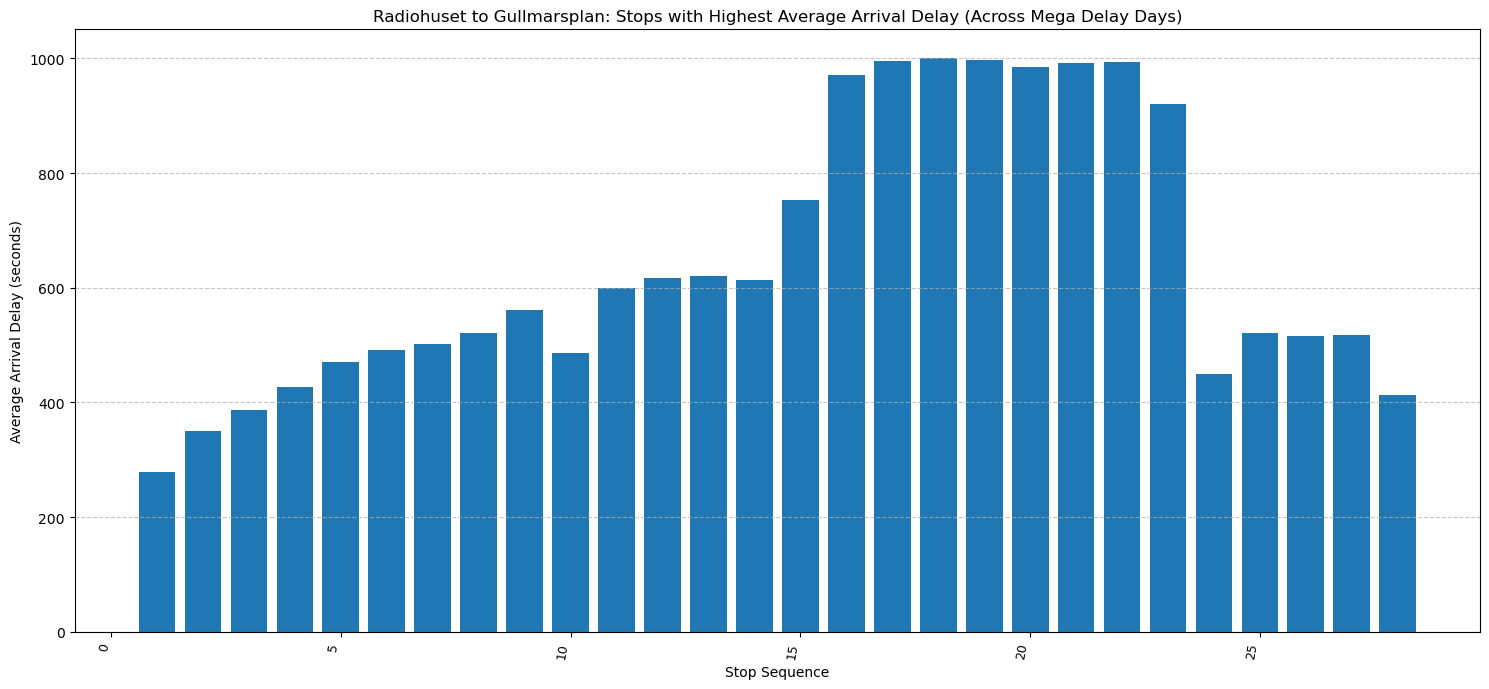

In [ ]:
print("\nGenerating plot...")
fig, ax = plt.subplots(figsize=(15, 7)) # Use fig, ax

ax.bar(top_stops1.index, top_stops1['mean_delay'])

ax.set_title(f'Radiohuset to Gullmarsplan: Stops with Highest Average Arrival Delay (Across Mega Delay Days)')
ax.set_xlabel('Stop Sequence')
ax.set_ylabel('Average Arrival Delay (seconds)')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=80, ha='right', fontsize=9) # Rotate labels
plt.tight_layout()
plt.show()


Generating plot...


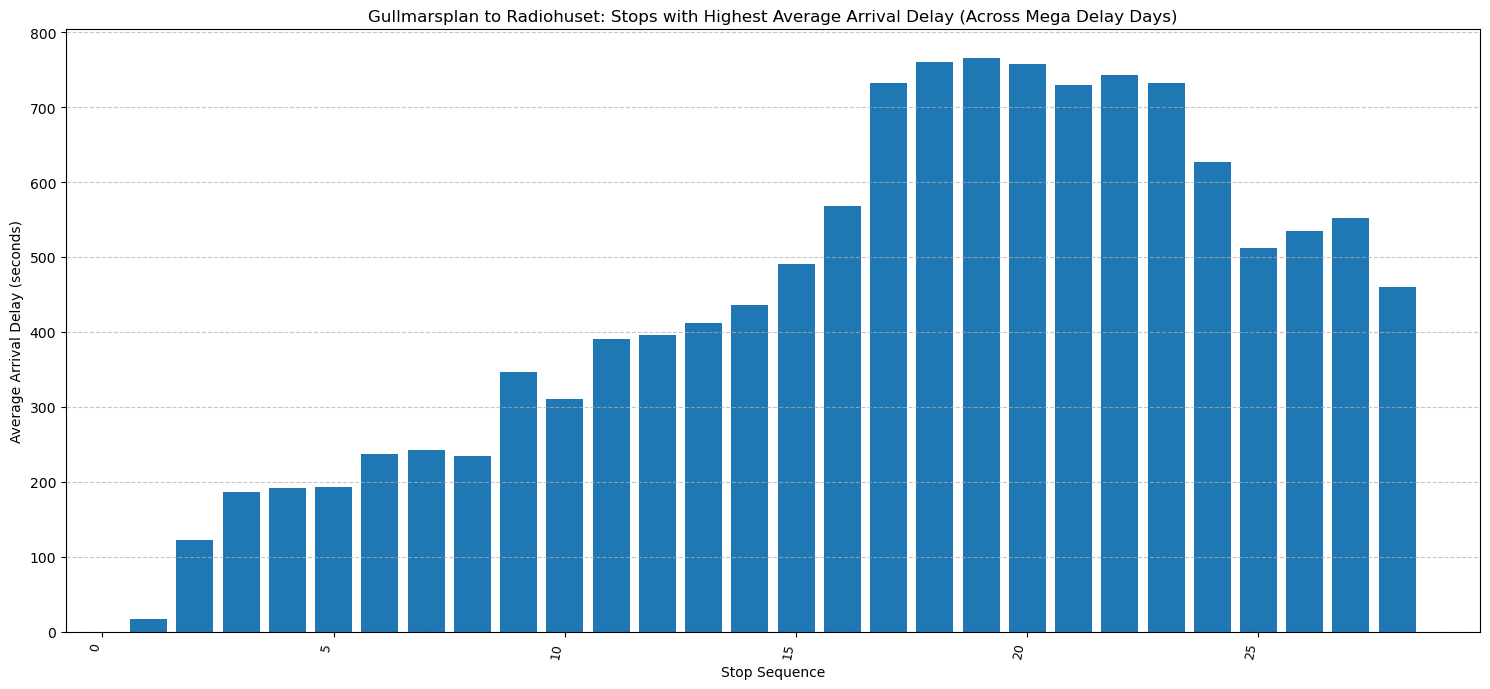

In [ ]:
print("\nGenerating plot...")
fig, ax = plt.subplots(figsize=(15, 7)) # Use fig, ax

ax.bar(top_stops2.index, top_stops2['mean_delay'])

ax.set_title(f'Gullmarsplan to Radiohuset: Stops with Highest Average Arrival Delay (Across Mega Delay Days)')
ax.set_xlabel('Stop Sequence')
ax.set_ylabel('Average Arrival Delay (seconds)')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=80, ha='right', fontsize=9) # Rotate labels
plt.tight_layout()
plt.show()

Checking which stop names are assinged to each sequence number:

In [ ]:
seq_delay_stats = df_mega_delay.groupby(['direction_label', 'stop_sequence'])['arrival_delay'].agg(mean_delay='mean', visit_count='count').reset_index()

unique_directions = seq_delay_stats['direction_label'].unique()
directions_to_analyze = [d for d in unique_directions if "Other Start" not in str(d) and "Unknown" not in str(d)]
if not directions_to_analyze: directions_to_analyze = unique_directions

for current_direction in directions_to_analyze:
        print(f"\n\n========== DIRECTION: {current_direction} ==========")

        # Filter stats for the current direction
        direction_seq_stats = seq_delay_stats[seq_delay_stats['direction_label'] == current_direction].copy()

        if direction_seq_stats.empty:
            print(f"  No data for direction '{current_direction}'.")
            continue

        # Sort by mean_delay to find top sequences for this direction
        top_sequences_for_direction = direction_seq_stats.sort_values('mean_delay', ascending=False).head(28)

        if top_sequences_for_direction.empty:
            print(f"  No top sequences to show for direction '{current_direction}'.")
            continue

        print(f"\n  Top {len(top_sequences_for_direction)} Stop Sequences by Mean Arrival Delay:")
        # Print the top sequences with their overall mean delay and visit count
        print(top_sequences_for_direction[['stop_sequence', 'mean_delay', 'visit_count']].to_string(index=False))

        # --- For each of these top sequences, list the associated stop names and their visit counts ---
        print("\n    Associated Stop Names for these Top Sequences:")
        for idx, top_seq_row in top_sequences_for_direction.iterrows():
            current_seq_num = top_seq_row['stop_sequence']
            print(f"      Sequence {current_seq_num} (Mean Delay: {top_seq_row['mean_delay']:.0f}s):")

            # Filter the original (cleaned) data for this direction and sequence number
            names_at_this_seq = df_mega_delay[
                (df_mega_delay['direction_label'] == current_direction) &
                (df_mega_delay['stop_sequence'] == current_seq_num)
            ]
            # Count occurrences of each stop_name at this specific sequence and direction
            stop_name_counts = names_at_this_seq['stop_name'].value_counts().reset_index()
            stop_name_counts.columns = ['stop_name', 'name_count']

            if not stop_name_counts.empty:
                for _, name_row in stop_name_counts.iterrows():
                    print(f"        - {name_row['stop_name']}: {name_row['name_count']} visits")
            else:
                print("          (No stop names found - this indicates an issue or all names were NaN)")



========== DIRECTION: Gullmarsplan_to_Radiohuset ==========

  Top 28 Stop Sequences by Mean Arrival Delay:
 stop_sequence  mean_delay  visit_count
            19  765.506849           73
            18  760.260274           73
            20  757.794521           73
            22  742.794521           73
            23  732.726027           73
            17  731.958904           73
            21  729.986301           73
            24  626.346154           52
            16  568.000000           73
            27  552.600000           15
            26  534.200000           15
            25  511.933333           15
            15  490.219178           73
            28  460.266667           15
            14  435.315068           73
            13  411.369863           73
            12  396.246575           73
            11  391.082192           73
             9  345.972603           73
            10  310.986301           73
             7  242.424658           73
          

In [ ]:
df_mega_delay['stop_sequence'].dtype

dtype('int64')

Found 6 unique mega delay dates to plot.
Directions to analyze: ['Radiohuset_to_Gullmarsplan', 'Gullmarsplan_to_Radiohuset']

--- Generating Plot for Date: 2021-12-02, Stop: 1, Direction: Radiohuset_to_Gullmarsplan ---


/var/folders/zb/qptczn7s6zv_my9lr7c3m_9c0000gn/T/ipykernel_18417/3153675471.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base_cmap = plt.cm.get_cmap('Blues')


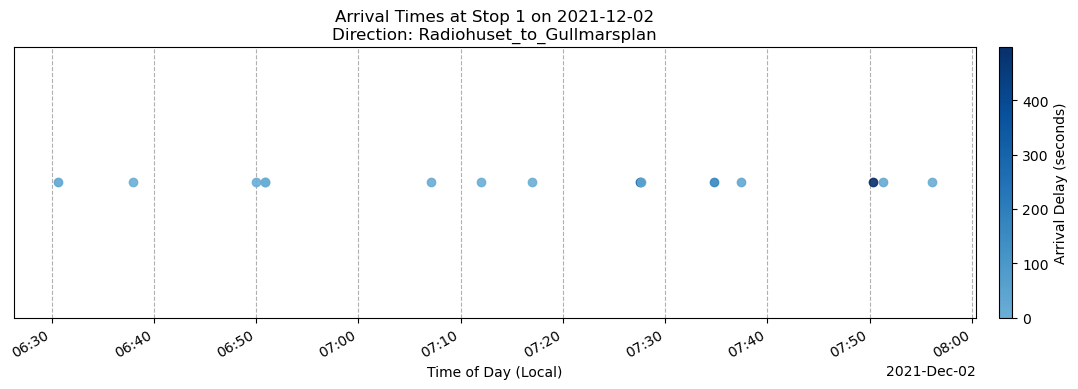


--- Generating Plot for Date: 2021-12-02, Stop: 1, Direction: Gullmarsplan_to_Radiohuset ---


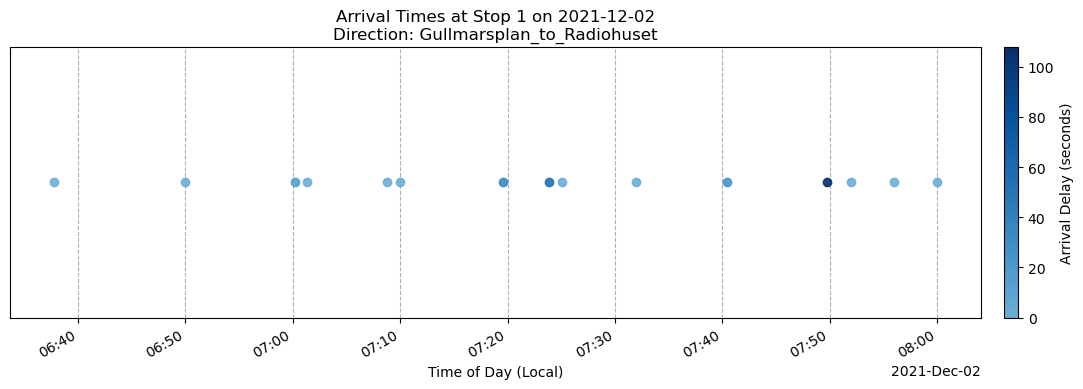


--- Generating Plot for Date: 2022-11-21, Stop: 1, Direction: Radiohuset_to_Gullmarsplan ---


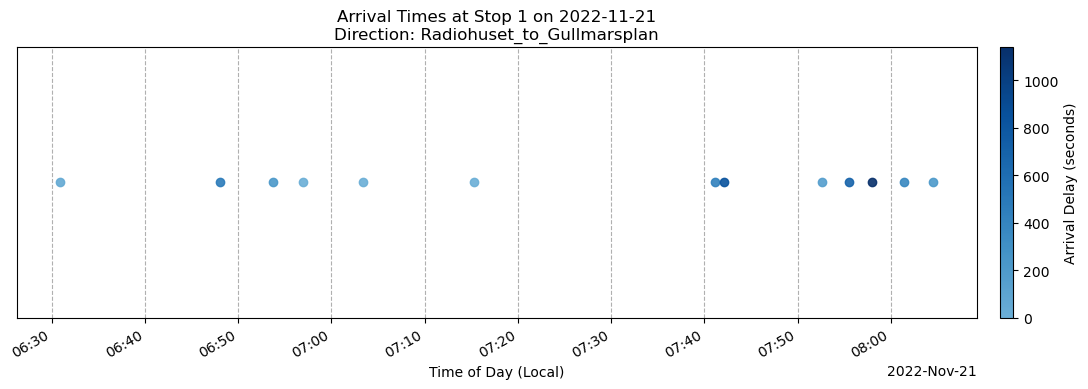


--- Generating Plot for Date: 2022-11-21, Stop: 1, Direction: Gullmarsplan_to_Radiohuset ---


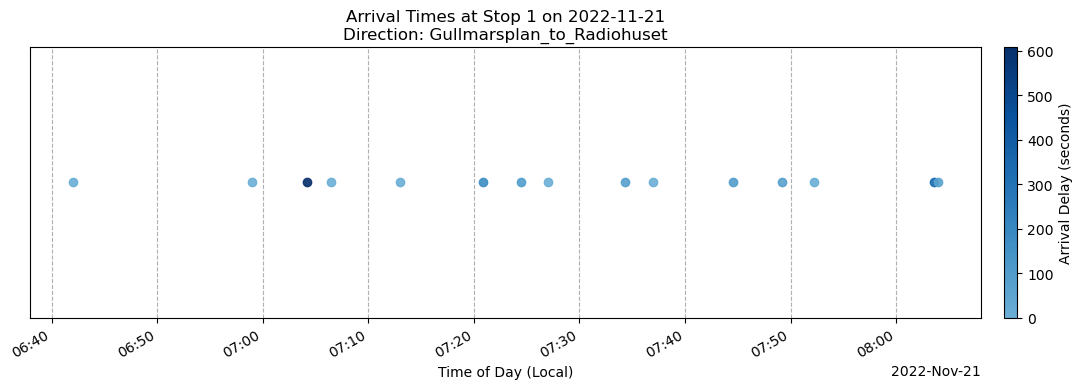


--- Generating Plot for Date: 2022-11-22, Stop: 1, Direction: Radiohuset_to_Gullmarsplan ---


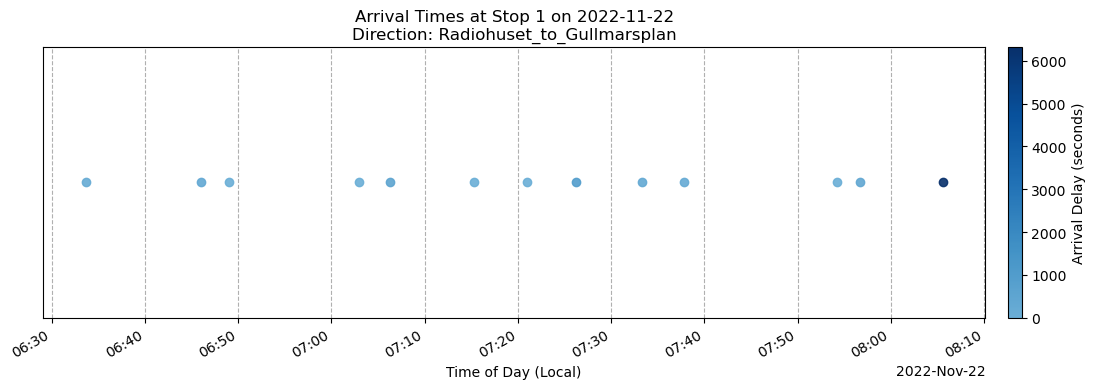


--- Generating Plot for Date: 2022-11-22, Stop: 1, Direction: Gullmarsplan_to_Radiohuset ---


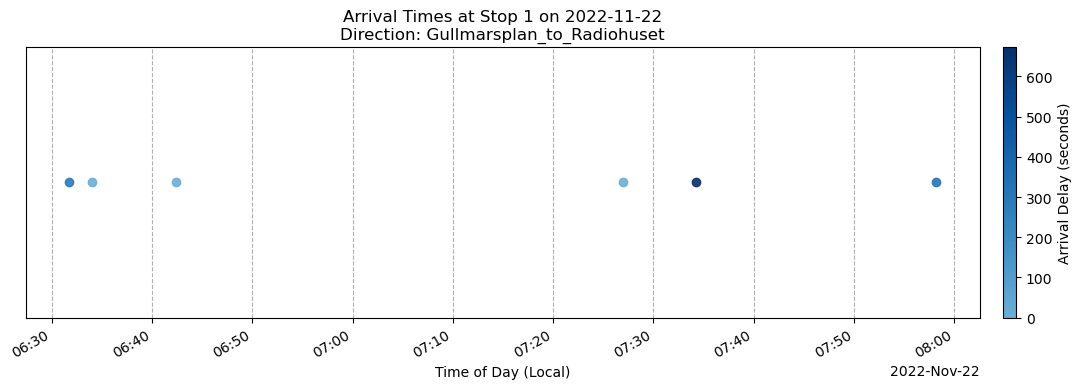


--- Generating Plot for Date: 2023-03-08, Stop: 1, Direction: Radiohuset_to_Gullmarsplan ---


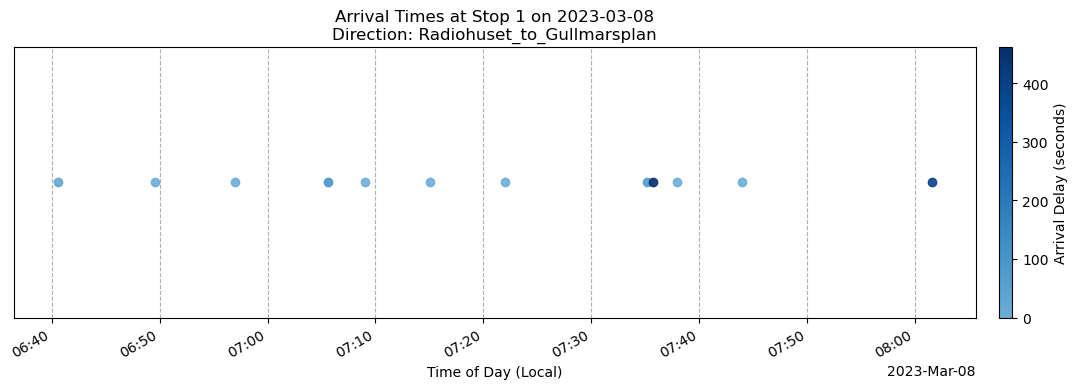


--- Generating Plot for Date: 2023-03-08, Stop: 1, Direction: Gullmarsplan_to_Radiohuset ---


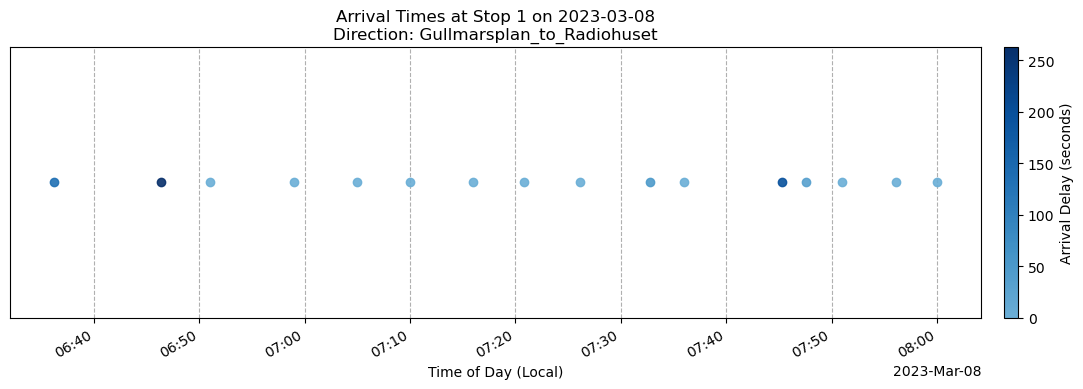


--- Generating Plot for Date: 2023-03-09, Stop: 1, Direction: Radiohuset_to_Gullmarsplan ---


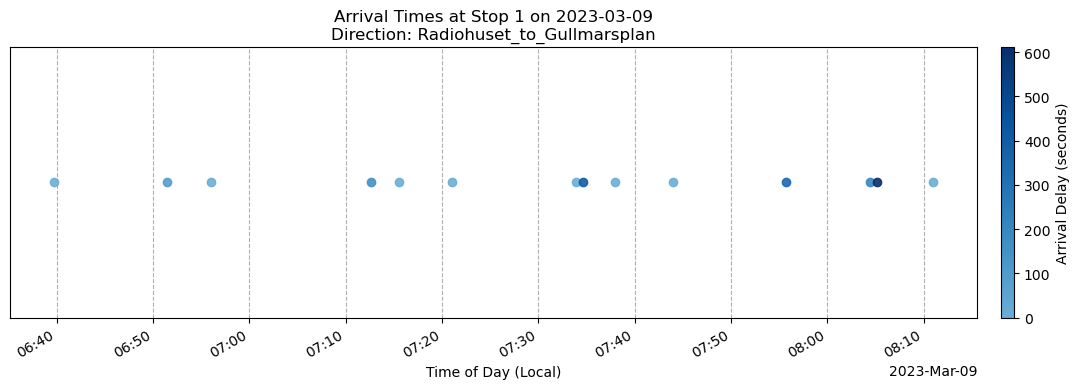


--- Generating Plot for Date: 2023-03-09, Stop: 1, Direction: Gullmarsplan_to_Radiohuset ---


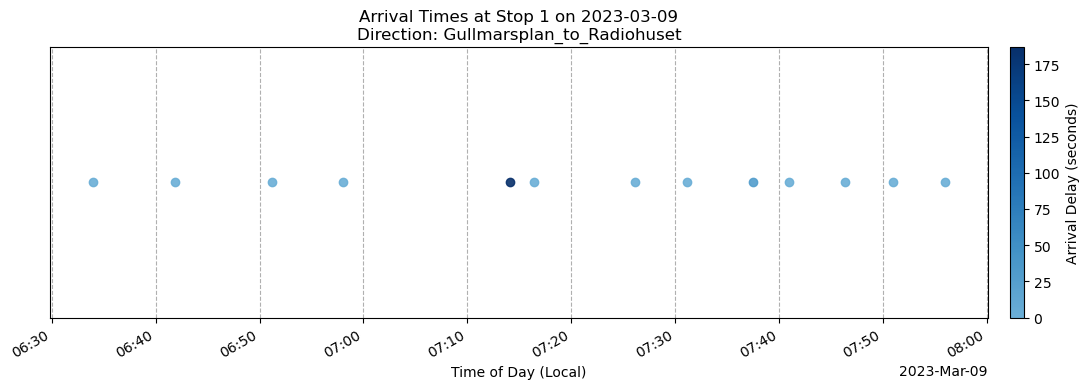


--- Generating Plot for Date: 2023-03-27, Stop: 1, Direction: Radiohuset_to_Gullmarsplan ---


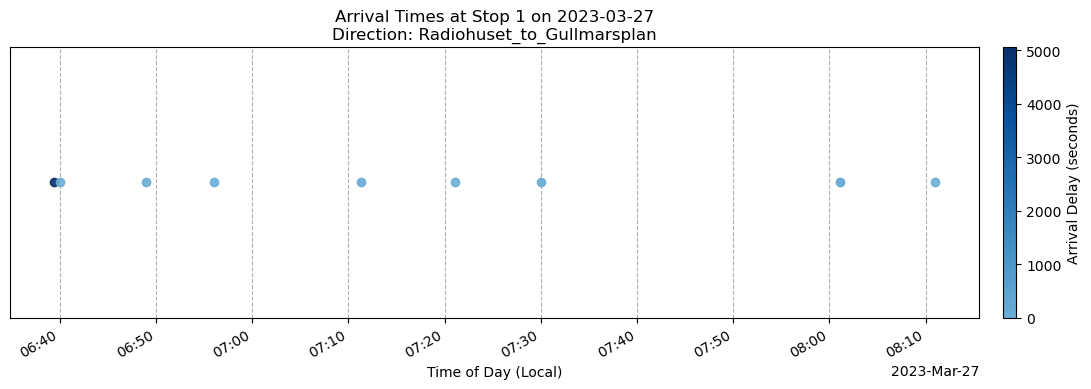


--- Generating Plot for Date: 2023-03-27, Stop: 1, Direction: Gullmarsplan_to_Radiohuset ---


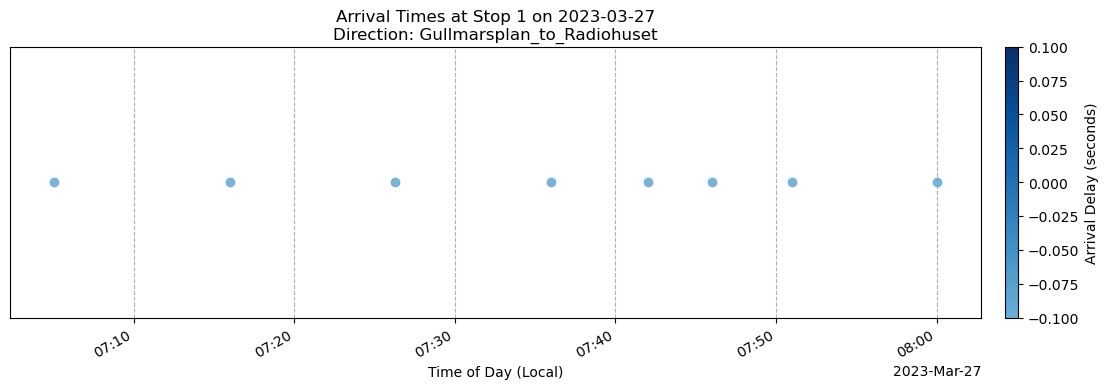

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# --- Helper: Truncate colormap ---
def truncate_colormap(cmap_in, minval=0.2, maxval=1.0, n=100):
    """Exclude lightest shades by truncating the beginning of the colormap."""
    new_cmap = LinearSegmentedColormap.from_list(
        f'trunc({cmap_in.name},{minval:.2f},{maxval:.2f})',
        cmap_in(np.linspace(minval, maxval, n))
    )
    return new_cmap

# --- 1. Define Columns and Target Stop ---
stop_to_analyze = 1
stop_col = 'stop_sequence'
time_col = 'arrival_time_local'  # Timezone-aware datetime column
trip_col = 'trip_id'             # Unique daily trip ID
date_info_col = 'date'           # Date column
direction_label_col = 'direction_label'
delay_col = 'arrival_delay'      # Column to color dots by

# --- 2. Initial Checks ---
required_cols = [date_info_col, stop_col, time_col, trip_col, direction_label_col, delay_col]
df_to_use = df_mega_delay  # Your DataFrame

if df_to_use.empty:
    print("Cannot proceed: DataFrame is empty.")
elif not all(col in df_to_use.columns for col in required_cols):
    missing = [col for col in required_cols if col not in df_to_use.columns]
    print(f"Error: DataFrame is missing one or more required columns: {missing}")
elif not pd.api.types.is_datetime64_any_dtype(df_to_use[time_col]):
    print(f"Error: Time column '{time_col}' does not contain datetime objects.")
else:
    # --- 3. Get Unique Dates and Directions ---
    unique_mega_dates = sorted(df_to_use[date_info_col].unique())
    unique_directions = df_to_use[direction_label_col].unique()
    directions_to_analyze = [d for d in unique_directions if "Other Start" not in str(d) and "Unknown" not in str(d)]
    if not directions_to_analyze:
        directions_to_analyze = unique_directions

    print(f"Found {len(unique_mega_dates)} unique mega delay dates to plot.")
    print(f"Directions to analyze: {directions_to_analyze}")

    # --- 4. Loop Through Each Date AND Each Direction ---
    for current_date in unique_mega_dates:
        date_str = current_date.strftime('%Y-%m-%d') if hasattr(current_date, 'strftime') else str(current_date)

        df_single_day_loop = df_to_use[df_to_use[date_info_col] == current_date].copy()
        if df_single_day_loop.empty:
            print(f"  No data found for date {date_str}.")
            continue

        for current_direction in directions_to_analyze:
            print(f"\n--- Generating Plot for Date: {date_str}, Stop: {stop_to_analyze}, Direction: {current_direction} ---")

            # Filter data for specific stop and direction
            df_stop_direction_loop = df_single_day_loop[
                (df_single_day_loop[stop_col] == stop_to_analyze) &
                (df_single_day_loop[direction_label_col] == current_direction)
            ].copy()

            if df_stop_direction_loop.empty:
                print(f"  No data for stop '{stop_to_analyze}' in direction '{current_direction}' on {date_str}.")
                continue

            df_stop_sorted_loop = df_stop_direction_loop.sort_values(time_col)
            delays = df_stop_sorted_loop[delay_col]

            # --- Plot Setup ---
            fig, ax = plt.subplots(figsize=(12, 4))
            y_values = [1] * len(df_stop_sorted_loop)

            # Normalize delay for colormap with truncation
            if delays.notna().any():
                vmin = max(0, delays.min())
                vmax = delays.max()
                norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
                base_cmap = plt.cm.get_cmap('Blues')
                cmap = truncate_colormap(base_cmap, minval=0.5, maxval=1.0)
            else:
                norm = None
                cmap = None

            # Plot each point with color based on delay
            for i, (time_val, delay_val) in enumerate(zip(df_stop_sorted_loop[time_col], delays)):
                color = cmap(norm(delay_val)) if pd.notna(delay_val) and cmap else 'grey'
                ax.plot(time_val, y_values[i], 'o', color=color, alpha=0.9, markersize=6)

            # Plot formatting
            ax.set_title(f'Arrival Times at Stop {stop_to_analyze} on {date_str}\nDirection: {current_direction}')
            ax.set_xlabel('Time of Day (Local)')
            ax.set_ylabel('')
            ax.set_yticks([])

            locator = mdates.AutoDateLocator(minticks=5, maxticks=12)
            formatter = mdates.ConciseDateFormatter(locator)
            ax.xaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            ax.grid(True, axis='x', linestyle='--')
            fig.autofmt_xdate()

            # Add colorbar if valid delays exist
            if cmap and norm:
                sm = cm.ScalarMappable(cmap=cmap, norm=norm)
                sm.set_array([])
                cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
                cbar.set_label(f'Arrival Delay (seconds)')

            plt.tight_layout()
            plt.show()

# Final fallback
if 'unique_mega_dates' not in locals() and not df_to_use.empty:
    print("\nPlotting loop did not run due to initial errors or no dates found.")
elif df_to_use.empty and 'df_to_use' in locals():
    print("\nNo plots generated because the input DataFrame was empty after initial checks.")


## Non-Cumulative Delay Analysis

Aggregate by stop sequence (rather than stop name) to account for the fact that there are different names

In [ ]:
def calc_non_cumulative_delay(df):
    # Ensure data is sorted by trip_id and then by stop_sequence for .diff() to work correctly
    df = df.sort_values(['trip_id', 'stop_sequence'])

    # Ensure 'arrival_delay' is numeric before any calculations
    if 'arrival_delay' in df.columns:
        df['arrival_delay'] = pd.to_numeric(df['arrival_delay'], errors='coerce')
    else:
        print("Warning: 'arrival_delay' column not found.")
        return df

    # Origin delay
    if 'trip_id' in df.columns and 'arrival_delay' in df.columns:
        # Group by both trip_id and date_info_col to avoid issues with reused trip IDs across days
        df['origin_delay'] = df.groupby(['trip_id', 'date'])['arrival_delay'].transform(
            lambda x: x.iloc[0] if not x.empty and pd.notna(x.iloc[0]) else np.nan
        )

    # --- Non-Cumulative Arrival Delay ---
    if 'trip_id' in df.columns and 'arrival_delay' in df.columns and 'stop_sequence' in df.columns:
        # Group by both trip_id and date_info_col to calculate non-cumulative delay within each day
        df['arrival_delay_non_cumulative'] = df.groupby(['trip_id', 'date'])['arrival_delay'].diff()

        # --- MODIFICATION: Directly set first stop's non-cumulative delay ---
        # Identify the first stop for each trip (lowest stop_sequence)
        # Create a boolean mask for these first stops
        first_stop_indices = df.groupby(['trip_id', 'date'])['stop_sequence'].idxmin()
        first_stop_mask = df.index.isin(first_stop_indices)

        # For these first stops, set non-cumulative delay to be equal to their cumulative arrival_delay
        df.loc[first_stop_mask, 'arrival_delay_non_cumulative'] = df.loc[first_stop_mask, 'arrival_delay']

        # Now, fill any *other* remaining NaNs (e.g., if original arrival_delay was NaN mid-trip) with 0.
        df['arrival_delay_non_cumulative'] = df['arrival_delay_non_cumulative'].fillna(0)

        print("Calculated 'arrival_delay_non_cumulative' (first stop's non-cumulative = its cumulative delay).")
    else:
        print("Warning: Could not calculate 'arrival_delay_non_cumulative' due to missing columns.")

    return df


In [ ]:
df_mega_delay_noncum = calc_non_cumulative_delay(df_mega_delay.copy())

Calculated 'arrival_delay_non_cumulative' (first stop's non-cumulative = its cumulative delay).


In [ ]:
stop_stats_mega_days_noncum = df_mega_delay_noncum.groupby('stop_sequence')['arrival_delay_non_cumulative'].agg(mean_delay='mean', visit_count='count')
stops_sorted_by_mean_noncum = stop_stats_mega_days_noncum.sort_values('mean_delay', ascending=False)
top_stops_noncum = stops_sorted_by_mean_noncum.head(30)
print(top_stops_noncum)

               mean_delay  visit_count
stop_sequence                         
1              149.919463          149
16             148.610738          149
15              98.791946          149
11              97.409396          149
17              93.181208          149
2               88.597315          149
9               75.315436          149
3               49.872483          149
6               32.744966          149
25              29.300000           30
5               23.362416          149
4               22.543624          149
18              16.496644          149
12              10.939597          149
27               9.766667           30
13               9.530201          149
26               8.333333           30
7                7.959732          149
14               7.570470          149
22               6.906040          149
8                5.395973          149
19               0.604027          149
20              -9.442953          149
21             -10.026846

Results: On average (regardless of direction), the trips start off delayed by more than 2min. Line segment between stop 15 and 16 experienced the highest delay avg. Buses seem to make up time at the end of the route. Nothing really stands out though overall.

Makes sense that stop 16 has a high non-cumulative delay because Valhallavagen (stop 17 or 20 depending on the sequence) had a high cumulative delay (on 2023-03-08 especially).

Maybe look into stop sequence 15 and 16 to see what might be causing the delays here (e.g., maybe lots of buses at those stops causing bunching?) -- Need to separate it out by direction first.

In [ ]:
# --- Now, perform the directional summary using the processed DataFrame ---
direction_col = 'direction_label'
stop_seq_col = 'stop_sequence'
non_cum_delay_col = 'arrival_delay_non_cumulative'

# Check if processed DataFrame and necessary columns exist
if not df_mega_delay_noncum.empty and all(col in df_mega_delay_noncum.columns for col in [direction_col, stop_seq_col, non_cum_delay_col]):
    print("\n--- Top Stop Sequences by MEAN Non-Cumulative Delay (Per Direction) ---")

    # Group by Direction, Stop Sequence, and Stop Name
    # Calculate mean non-cumulative delay and count visits
    summary_by_direction_seq_name = df_mega_delay_noncum.dropna(
        subset=[non_cum_delay_col] # Ensure we have data for these
    ).groupby([direction_col, stop_seq_col]).agg(
        mean_non_cum_delay=(non_cum_delay_col, 'mean'),
        visit_count=(non_cum_delay_col, 'count')
    ).reset_index()

    unique_directions = summary_by_direction_seq_name[direction_col].unique()
    directions_to_analyze = [d for d in unique_directions if "Other Start" not in str(d) and "Unknown" not in str(d)]
    if not directions_to_analyze and len(unique_directions) > 0 : directions_to_analyze = unique_directions


    N_top_display = 30 # Number of top entries to show

    for current_direction in directions_to_analyze:
        print(f"\n========== DIRECTION: {current_direction} ==========")
        direction_summary = summary_by_direction_seq_name[
            summary_by_direction_seq_name[direction_col] == current_direction
        ]

        if direction_summary.empty:
            print("  No data for this direction.")
            continue

        # Sort by mean_non_cum_delay for this direction
        top_stops_for_direction = direction_summary.sort_values(
            'mean_non_cum_delay', ascending=False
        ).head(N_top_display)

        print(f"  Top {N_top_display} (Stop Sequence) by Mean Non-Cumulative Delay:")
        print(top_stops_for_direction[[stop_seq_col, 'mean_non_cum_delay', 'visit_count']].to_string(index=False))
else:
    print("Could not generate directional summary. Check DataFrame and column names after field calculation.")


--- Top Stop Sequences by MEAN Non-Cumulative Delay (Per Direction) ---

========== DIRECTION: Gullmarsplan_to_Radiohuset ==========
  Top 30 (Stop Sequence) by Mean Non-Cumulative Delay:
 stop_sequence  mean_non_cum_delay  visit_count
            17          163.958904           73
             9          111.794521           73
             2          105.643836           73
            11           80.095890           73
            16           77.780822           73
             3           63.780822           73
            15           54.904110           73
             6           44.178082           73
            18           28.301370           73
            14           23.945205           73
            26           22.266667           15
            27           18.400000           15
             1           16.698630           73
            13           15.123288           73
            22           12.808219           73
            19            5.246575         

In [ ]:
def get_top_delayed_stops_for_day(df, target_date_str, N_top=30):

    # --- Define Columns ---
    date_col = 'date'
    direction_col = 'direction_label'
    stop_name_col = 'stop_name'
    stop_seq_col = 'stop_sequence'
    cum_delay_col = 'arrival_delay'
    non_cum_delay_col = 'arrival_delay_non_cumulative'

    # --- Convert target_date_str to date object ---
    try:
        target_date_obj = pd.to_datetime(target_date_str).date()
    except Exception as e:
        print(f"Error: Invalid target_date_str '{target_date_str}'. Please use YYYY-MM-DD format. Error: {e}")
        return

    # --- Initial Checks ---
    required_cols = [date_col, direction_col, stop_name_col, stop_seq_col, cum_delay_col, non_cum_delay_col]
    if df.empty:
        print("Cannot proceed: Input DataFrame is empty.")
        return
    if not all(col in df.columns for col in required_cols):
        missing = [col for col in required_cols if col not in df.columns]
        print(f"Error: DataFrame is missing one or more required columns: {missing}")
        return
    # Ensure date column is date objects for comparison
    if not isinstance(df[date_col].iloc[0], type(target_date_obj)) and hasattr(df[date_col].iloc[0], 'date'):
        print(f"Converting '{date_col}' to date objects for filtering...")
        df[date_col] = pd.to_datetime(df[date_col]).dt.date # Convert to date objects if full datetime

    # --- Filter for the Target Date ---
    df_target_day = df[df[date_col] == target_date_obj].copy()

    if df_target_day.empty:
        print(f"No data found for date: {target_date_str}")
        return

    print(f"--- Top Delayed Stops for Date: {target_date_str} ---")

    # --- Get Unique Directions to Analyze ---
    unique_directions = df_target_day[direction_col].unique()
    directions_to_analyze = [d for d in unique_directions if "Other Start" not in str(d) and "Unknown" not in str(d)]
    if not directions_to_analyze and len(unique_directions) > 0 :
        directions_to_analyze = unique_directions


    for current_direction in directions_to_analyze:
        print(f"\n========== DIRECTION: {current_direction} ==========")

        df_day_direction = df_target_day[df_target_day[direction_col] == current_direction].copy()

        if df_day_direction.empty:
            print("  No data for this direction on this date.")
            continue

        # --- Calculate Stats for this day/direction ---
        # Ensure delay columns are numeric and drop NaNs before aggregation
        df_day_direction[cum_delay_col] = pd.to_numeric(df_day_direction[cum_delay_col], errors='coerce')
        df_day_direction[non_cum_delay_col] = pd.to_numeric(df_day_direction[non_cum_delay_col], errors='coerce')

        stats = df_day_direction.dropna(
            subset=[cum_delay_col, non_cum_delay_col, stop_name_col] # Ensure stop_name is not NaN
        ).groupby(
            [stop_name_col, stop_seq_col] # Group by name and sequence
        ).agg(
            mean_cumulative_delay=(cum_delay_col, 'mean'),
            mean_non_cumulative_delay=(non_cum_delay_col, 'mean'),
            visit_count=(cum_delay_col, 'count')
        ).reset_index()

        if stats.empty:
            print("  No valid stats could be calculated (all delays might be NaN).")
            continue

        # --- Top Cumulative Delay Stops ---
        top_cum = stats.sort_values('mean_cumulative_delay', ascending=False).head(N_top)
        print(f"\n  Top {N_top} (Stop Name, Sequence) by MEAN CUMULATIVE Delay:")
        if top_cum.empty:
            print("    No data to display.")
        else:
            print(top_cum[[stop_name_col, stop_seq_col, 'mean_cumulative_delay', 'visit_count']].to_string(index=False))

        # --- Top Non-Cumulative Delay Stops ---
        top_non_cum = stats.sort_values('mean_non_cumulative_delay', ascending=False).head(N_top)
        print(f"\n  Top {N_top} (Stop Name, Sequence) by MEAN NON-CUMULATIVE Delay:")
        if top_non_cum.empty:
            print("    No data to display.")
        else:
            print(top_non_cum[[stop_name_col, stop_seq_col, 'mean_non_cumulative_delay', 'visit_count']].to_string(index=False))

In [ ]:
get_top_delayed_stops_for_day(df_mega_delay_noncum, '2023-03-08', N_top=30)

--- Top Delayed Stops for Date: 2023-03-08 ---

========== DIRECTION: Radiohuset_to_Gullmarsplan ==========

  Top 30 (Stop Name, Sequence) by MEAN CUMULATIVE Delay:
       stop_name  stop_sequence  mean_cumulative_delay  visit_count
   Västerbroplan             16             583.500000           12
      Varvsgatan             18             575.250000           12
       Hornstull             17             561.000000           12
     Zinkensdamm             19             558.500000           12
        Eriksdal             22             549.250000           12
       Skanstull             23             546.416667           12
       Rosenlund             21             542.333333           12
   Södra station             20             524.916667           12
    Fridhemsplan             15             437.750000           12
    Fleminggatan             14             423.916667           12
Stadsbiblioteket             10             411.416667           12
       Dalagatan  